In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pandas.plotting import scatter_matrix

In [3]:
import torch

print(torch.version.cuda)
print(torch.backends.cudnn.enabled)

12.8
True


In [4]:
if not torch.cuda.is_available():
    raise RuntimeError('CUDA is not available. Check your drivers and installation!')
print('Found', torch.cuda.device_count(), 'GPU(s):', [torch.cuda.get_device_name(i) for i in range(torch.cuda.device_count())])

Found 1 GPU(s): ['NVIDIA GeForce RTX 3070 Ti Laptop GPU']


In [5]:
device = torch.device('cuda') 

## DMG 1 MK2

### Dataset 2 has anomaly

In [6]:
df2 = pd.read_csv('./Datasets/Dataset02_Matrix_Rocker4EncoderNotWorking.csv')
df2.head()

Encoder_vAxisHFP_1  Encoder_vAxisHFP_2  Encoder_vAxisHFP_3  \
0           -0.018964           -0.025433            0.008373   
1           -0.025091           -0.021360            0.007988   
2           -0.026657           -0.021689            0.007212   
3           -0.023970           -0.019123            0.009580   
4           -0.027541           -0.020061            0.001411   

   Encoder_vAxisHFP_4  Encoder_vAxisHFP_5  Encoder_vAxisHFP_6  \
0            0.001387           -0.014673            0.010472   
1           -0.001536           -0.008852            0.002152   
2           -0.000004           -0.005338           -0.005628   
3           -0.001420           -0.002740           -0.009748   
4            0.006533           -0.010312           -0.012460   

   Encoder_vSafetyHFP_1  Encoder_vSafetyHFP_2  Encoder_vSafetyHFP_3  \
0             -0.000006              0.000030          9.411765e-07   
1             -0.000006              0.000030          9.411765e-07   
2             -0.000006              0.000030          9.411765e-07   
3             -0.000006              0.000015          9.411765e-07   
4             -0.000014              0.000015          9.411765e-07   

   Encoder_vSafetyHFP_4  Encoder_vSafetyHFP_5  Encoder_vSafetyHFP_6     Time  
0                   0.0             -0.000021             -0.000006  0.00000  
1                   0.0             -0.000021             -0.000005  0.00025  
2                   0.0             -0.000021             -0.000005  0.00050  
3                   0.0             -0.000021             -0.000005  0.00075  
4                   0.0             -0.000019             -0.000005  0.00100

### Dataset 7, 8, 9, 10 do not have anomaly

In [7]:
df7 = pd.read_csv('./Datasets/Dataset07_Demo_Spa_GT.csv')
df8 = pd.read_csv('./Datasets/Dataset08_Demo_Jiggler.csv')
df9 = pd.read_csv('./Datasets/Dataset09_Demo_VerticalChirp.csv')
df10 = pd.read_csv('./Datasets/Dataset10_Demo_Spa_GT.csv')

print('Dataset 2 shape:', df2.shape)
print('Dataset 7 shape:', df7.shape)
print('Dataset 8 shape:', df8.shape)
print('Dataset 9 shape:', df9.shape)    
print('Dataset 10 shape:', df10.shape)

Dataset 2 shape: (69377, 13)
Dataset 7 shape: (345300, 85)
Dataset 8 shape: (124600, 13)
Dataset 9 shape: (79200, 13)
Dataset 10 shape: (565600, 85)


In [8]:
df8.head()

Encoder_xAxisHFP_1  Encoder_xAxisHFP_2  Encoder_xAxisHFP_3  \
0            1.346476            1.678421            1.779897   
1            1.346182            1.678822            1.780083   
2            1.346476            1.678702            1.780454   
3            1.346739            1.678798            1.780718   
4            1.347135            1.678810            1.781353   

   Encoder_xAxisHFP_4  Encoder_xAxisHFP_5  Encoder_xAxisHFP_6  \
0            1.704498            0.490239            0.371858   
1            1.704193            0.489652            0.371529   
2            1.704474            0.490047            0.371283   
3            1.704181            0.489681            0.371193   
4            1.704325            0.489094            0.371181   

   Encoder_vAxisHFP_1  Encoder_vAxisHFP_2  Encoder_vAxisHFP_3  \
0            8.361759           -0.489034            1.268314   
1           -3.524980           -1.328421            0.705853   
2           -0.216795            1.683945            0.187439   
3           -2.441366           -5.807879           -0.797604   
4            5.833975           -1.059226            4.136967   

   Encoder_vAxisHFP_4  Encoder_vAxisHFP_5  Encoder_vAxisHFP_6    Time  
0            1.400914            5.572665            0.169277  0.0000  
1           -3.247539           -4.825640           -1.215278  0.0005  
2            2.142809            7.067955           -2.946010  0.0010  
3           -0.900363            1.097144           -1.367628  0.0015  
4            8.869238           -3.777398            2.828397  0.0020

In [9]:
df9.head()

Encoder_xAxisHFP_1  Encoder_xAxisHFP_2  Encoder_xAxisHFP_3  \
0            1.090295            1.129411            1.136872   
1            1.090337            1.129256            1.136949   
2            1.090469            1.129459            1.136758   
3            1.090582            1.129357            1.136943   
4            1.090564            1.129519            1.136668   

   Encoder_xAxisHFP_4  Encoder_xAxisHFP_5  Encoder_xAxisHFP_6  \
0            1.097449            0.845158            0.845787   
1            1.097354            0.844894            0.845679   
2            1.097132            0.845361            0.845697   
3            1.097545            0.845002            0.845547   
4            1.097725            0.845026            0.845769   

   Encoder_vAxisHFP_1  Encoder_vAxisHFP_2  Encoder_vAxisHFP_3  \
0           -4.989021            0.646729            1.621310   
1           -1.748642           -0.864758           -0.299018   
2            4.315208           -1.429892           -2.949755   
3           -0.578964            2.919351            0.251201   
4           -2.083757           -0.321513            1.720767   

   Encoder_vAxisHFP_4  Encoder_vAxisHFP_5  Encoder_vAxisHFP_6    Time  
0           -1.393544            4.264065           -0.787076  0.0000  
1           -1.439162           -1.657592            3.300695  0.0005  
2           -5.802564            3.474137            0.849502  0.0010  
3           -0.791732           -0.833515            2.072803  0.0015  
4            3.018173           -1.219515            3.290257  0.0020

In [10]:
print('Dataset 2 columns:', df2.columns.tolist())
print('Dataset 8 columns:', df8.columns.tolist())
print('Dataset 9 columns:', df9.columns.tolist())

Dataset 2 columns: ['Encoder_vAxisHFP_1', 'Encoder_vAxisHFP_2', 'Encoder_vAxisHFP_3', 'Encoder_vAxisHFP_4', 'Encoder_vAxisHFP_5', 'Encoder_vAxisHFP_6', 'Encoder_vSafetyHFP_1', 'Encoder_vSafetyHFP_2', 'Encoder_vSafetyHFP_3', 'Encoder_vSafetyHFP_4', 'Encoder_vSafetyHFP_5', 'Encoder_vSafetyHFP_6', 'Time']
Dataset 8 columns: ['Encoder_xAxisHFP_1', 'Encoder_xAxisHFP_2', 'Encoder_xAxisHFP_3', 'Encoder_xAxisHFP_4', 'Encoder_xAxisHFP_5', 'Encoder_xAxisHFP_6', 'Encoder_vAxisHFP_1', 'Encoder_vAxisHFP_2', 'Encoder_vAxisHFP_3', 'Encoder_vAxisHFP_4', 'Encoder_vAxisHFP_5', 'Encoder_vAxisHFP_6', 'Time']
Dataset 9 columns: ['Encoder_xAxisHFP_1', 'Encoder_xAxisHFP_2', 'Encoder_xAxisHFP_3', 'Encoder_xAxisHFP_4', 'Encoder_xAxisHFP_5', 'Encoder_xAxisHFP_6', 'Encoder_vAxisHFP_1', 'Encoder_vAxisHFP_2', 'Encoder_vAxisHFP_3', 'Encoder_vAxisHFP_4', 'Encoder_vAxisHFP_5', 'Encoder_vAxisHFP_6', 'Time']


Dataset 7 and 10 have a different shape to not using it right now

In [11]:
from sklearn.preprocessing import MinMaxScaler

def minmax_run(df, feature_cols):
    scaler = MinMaxScaler(feature_range=(0,1))
    df_scaled = df.copy()
    df_scaled[feature_cols] = scaler.fit_transform(df[feature_cols])
    return df_scaled

sensor_cols = df8.columns[6:-1].tolist()
df8_mm = minmax_run(df8, sensor_cols)
df9_mm = minmax_run(df9, sensor_cols)
pooled = pd.concat([df8_mm[sensor_cols + ['Time']], df9_mm[sensor_cols + ['Time']]], ignore_index=True)
pooled.shape

(203800, 7)

In [12]:
pooled.head()

Encoder_vAxisHFP_1  Encoder_vAxisHFP_2  Encoder_vAxisHFP_3  \
0            0.690005            0.477602            0.534150   
1            0.382866            0.449355            0.512893   
2            0.468346            0.550730            0.493300   
3            0.410865            0.298607            0.456071   
4            0.624690            0.458414            0.642567   

   Encoder_vAxisHFP_4  Encoder_vAxisHFP_5  Encoder_vAxisHFP_6    Time  
0            0.532790            0.713962            0.525449  0.0000  
1            0.375568            0.336243            0.464972  0.0005  
2            0.557882            0.768278            0.389374  0.0010  
3            0.454955            0.551388            0.458317  0.0015  
4            0.785387            0.374320            0.641598  0.0020

### Isolation Forest

In [30]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(
    n_estimators=100,
    max_samples='auto',
    contamination=0.001,
    random_state=42,
)

iso.fit(pooled)


IsolationForest(contamination=0.001, random_state=42)

In [34]:
df2_mm = minmax_run(df2, sensor_cols)

# get raw anomaly scores
anomaly_scores = iso.decision_function(df2_mm[sensor_cols + ['Time']])

# flag anomalies (True/False)
df2_mm['is_anomaly'] = iso.predict(df2_mm[sensor_cols + ['Time']]) == -1


In [15]:
df2_mm['is_anomaly'].value_counts()

is_anomaly
False    67371
True      2006
Name: count, dtype: int64

In [16]:
df2_mm

Encoder_vAxisHFP_1  Encoder_vAxisHFP_2  Encoder_vAxisHFP_3  \
0                0.387098            0.352460            0.544190   
1                0.350818            0.378774            0.541947   
2                0.341542            0.376648            0.537419   
3                0.357453            0.393225            0.551232   
4                0.336309            0.387169            0.503576   
...                   ...                 ...                 ...   
69372            0.193243            0.686989            0.460116   
69373            0.202703            0.700221            0.476729   
69374            0.208475            0.711970            0.446924   
69375            0.204369            0.698291            0.425260   
69376            0.214127            0.692390            0.441338   

       Encoder_vAxisHFP_4  Encoder_vAxisHFP_5  Encoder_vAxisHFP_6  \
0                0.496764            0.455315            0.498785   
1                0.479117            0.491167            0.448354   
2                0.488364            0.512807            0.401195   
3                0.479818            0.528808            0.376222   
4                0.527843            0.482172            0.359786   
...                   ...                 ...                 ...   
69372            0.525106            0.565246            0.395944   
69373            0.517238            0.556117            0.404297   
69374            0.520223            0.557257            0.397892   
69375            0.515507            0.608679            0.372314   
69376            0.555357            0.611346            0.357935   

       Encoder_vSafetyHFP_1  Encoder_vSafetyHFP_2  Encoder_vSafetyHFP_3  \
0                 -0.000006              0.000030          9.411765e-07   
1                 -0.000006              0.000030          9.411765e-07   
2                 -0.000006              0.000030          9.411765e-07   
3                 -0.000006              0.000015          9.411765e-07   
4                 -0.000014              0.000015          9.411765e-07   
...                     ...                   ...                   ...   
69372              0.000026             -0.000049          5.835294e-05   
69373              0.000026             -0.000049          5.835294e-05   
69374              0.000026             -0.000049          5.835294e-05   
69375              0.000026             -0.000049          5.835294e-05   
69376              0.000023             -0.000042          5.082353e-05   

       Encoder_vSafetyHFP_4  Encoder_vSafetyHFP_5  Encoder_vSafetyHFP_6  \
0                       0.0         -2.070588e-05             -0.000006   
1                       0.0         -2.070588e-05             -0.000005   
2                       0.0         -2.070588e-05             -0.000005   
3                       0.0         -2.070588e-05             -0.000005   
4                       0.0         -1.882353e-05             -0.000005   
...                     ...                   ...                   ...   
69372                   0.0          9.411765e-06             -0.000030   
69373                   0.0          9.411765e-06             -0.000030   
69374                   0.0          9.411765e-06             -0.000030   
69375                   0.0          9.411765e-06             -0.000030   
69376                   0.0         -9.411765e-07             -0.000038   

           Time  is_anomaly  
0       0.00000       False  
1       0.00025       False  
2       0.00050       False  
3       0.00075       False  
4       0.00100       False  
...         ...         ...  
69372  17.34300       False  
69373  17.34325       False  
69374  17.34350       False  
69375  17.34375       False  
69376  17.34400       False  

[69377 rows x 14 columns]

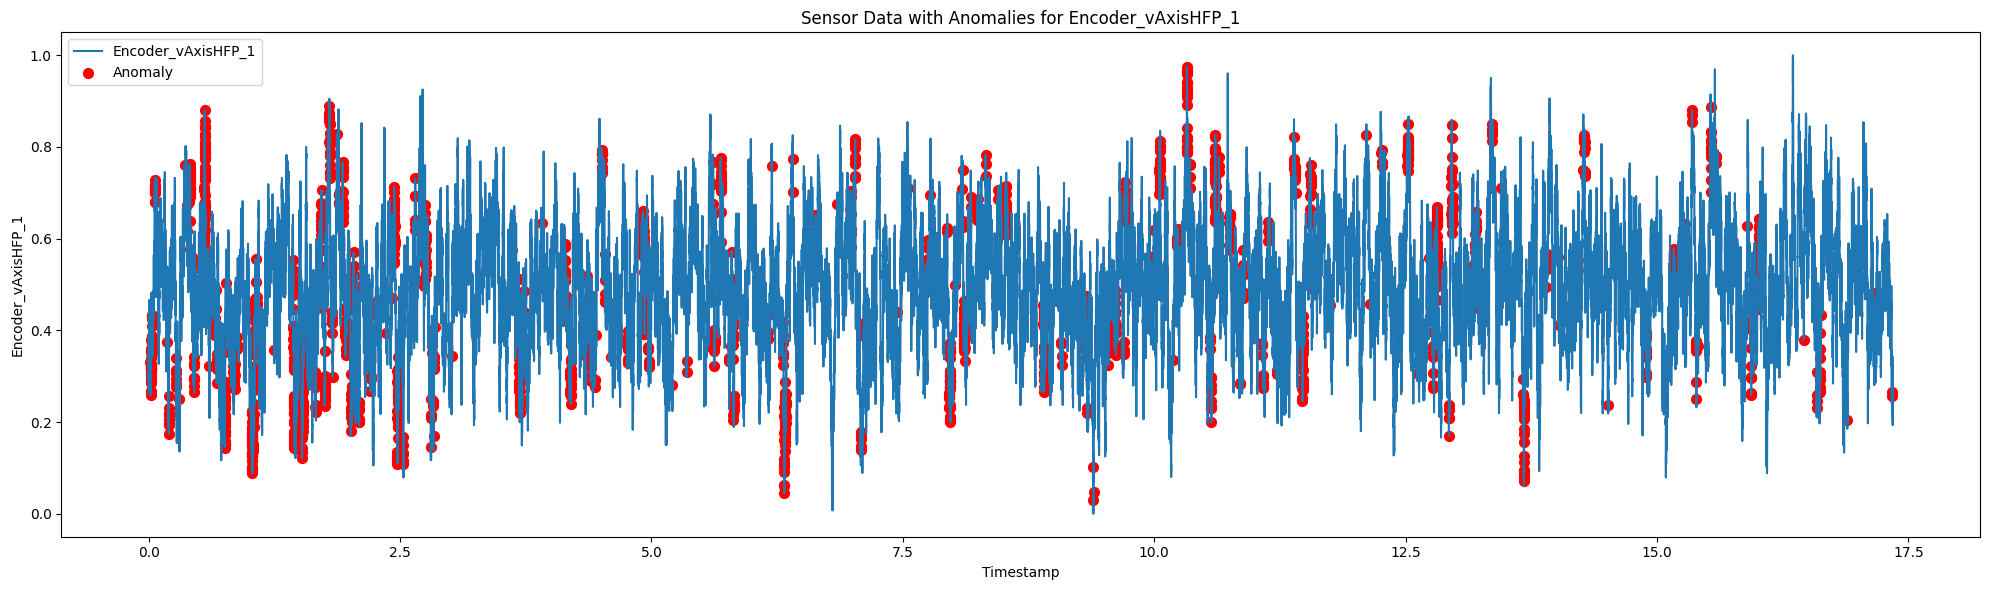

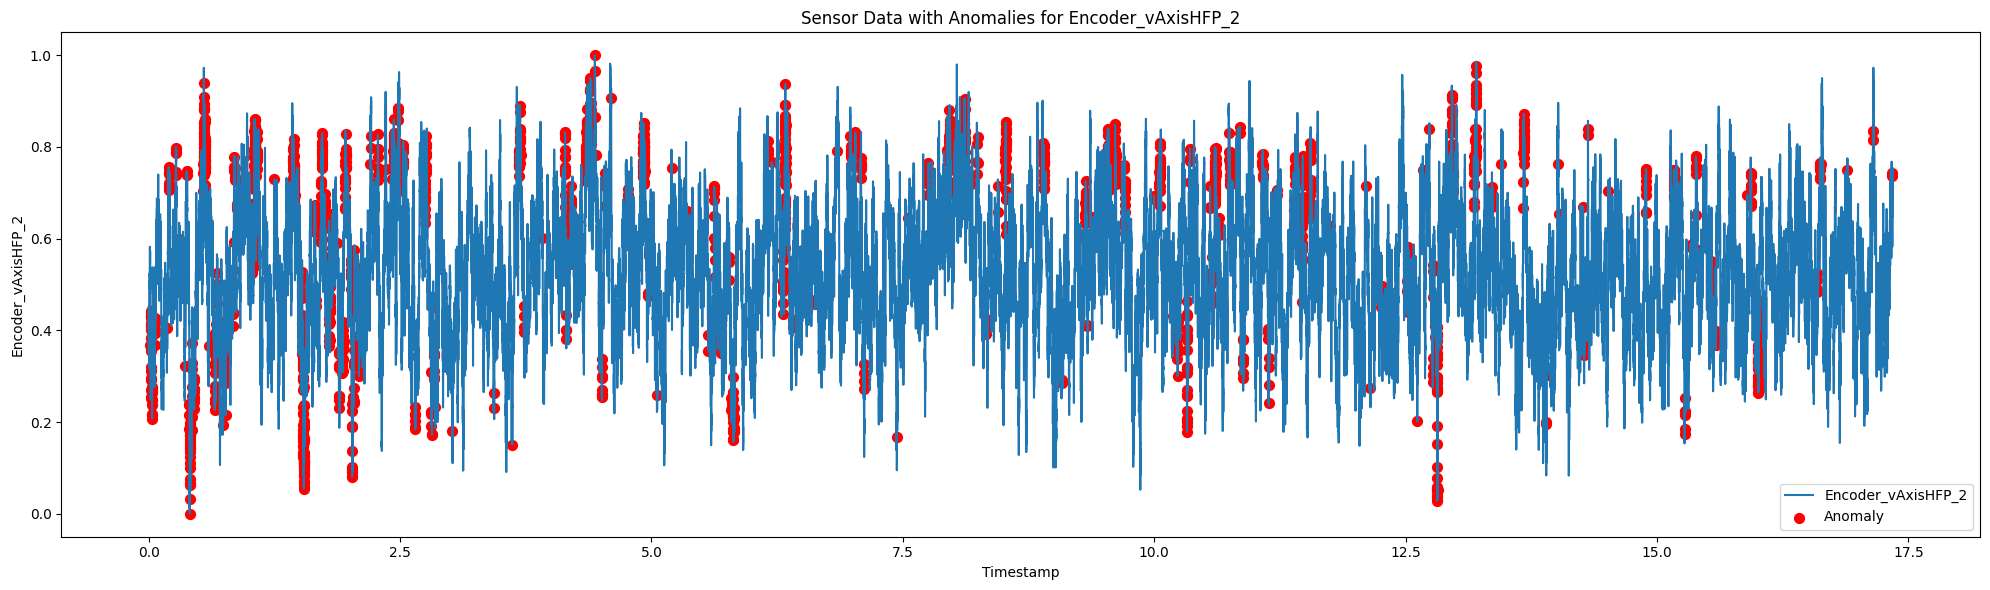

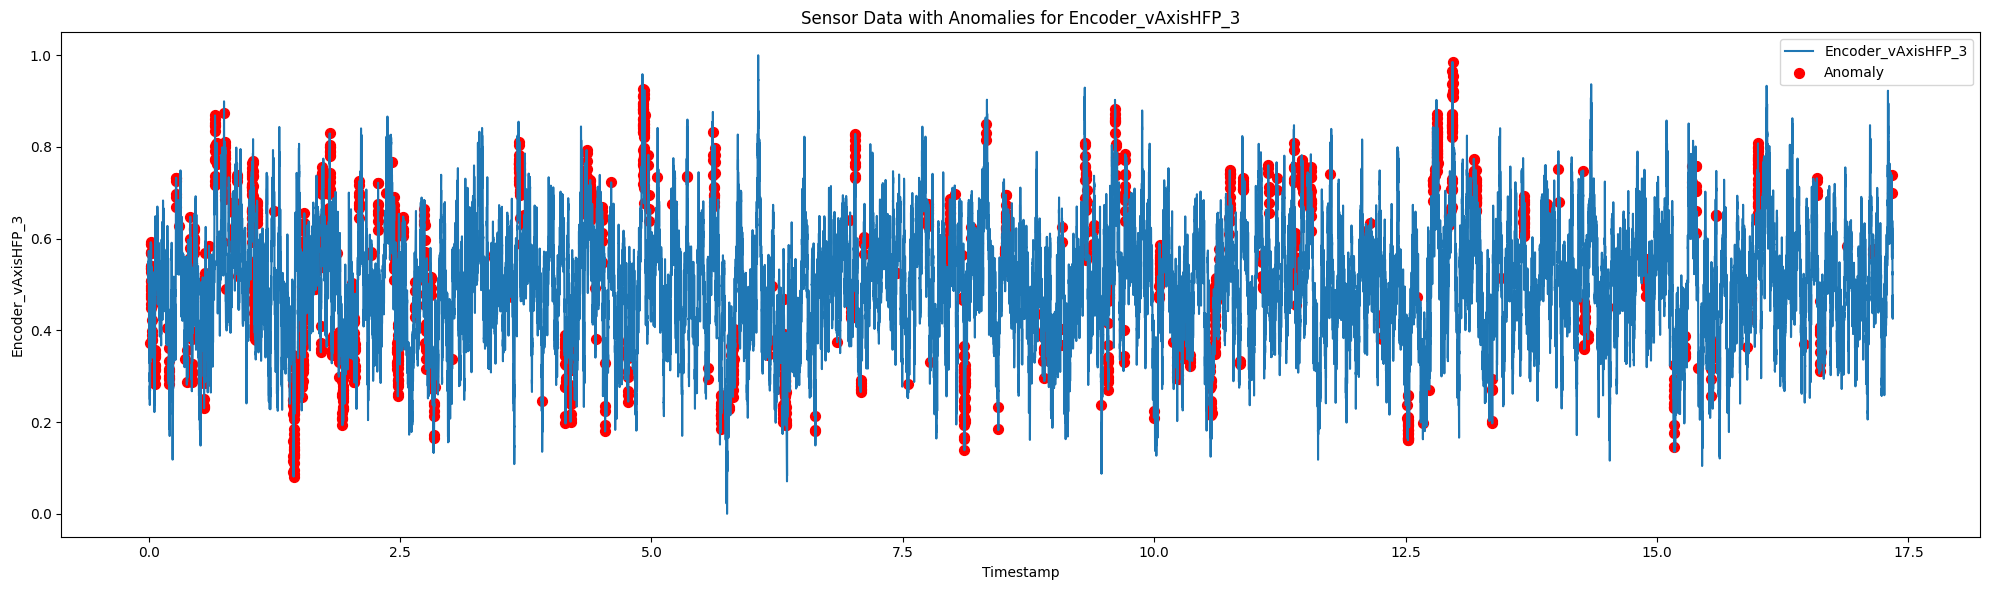

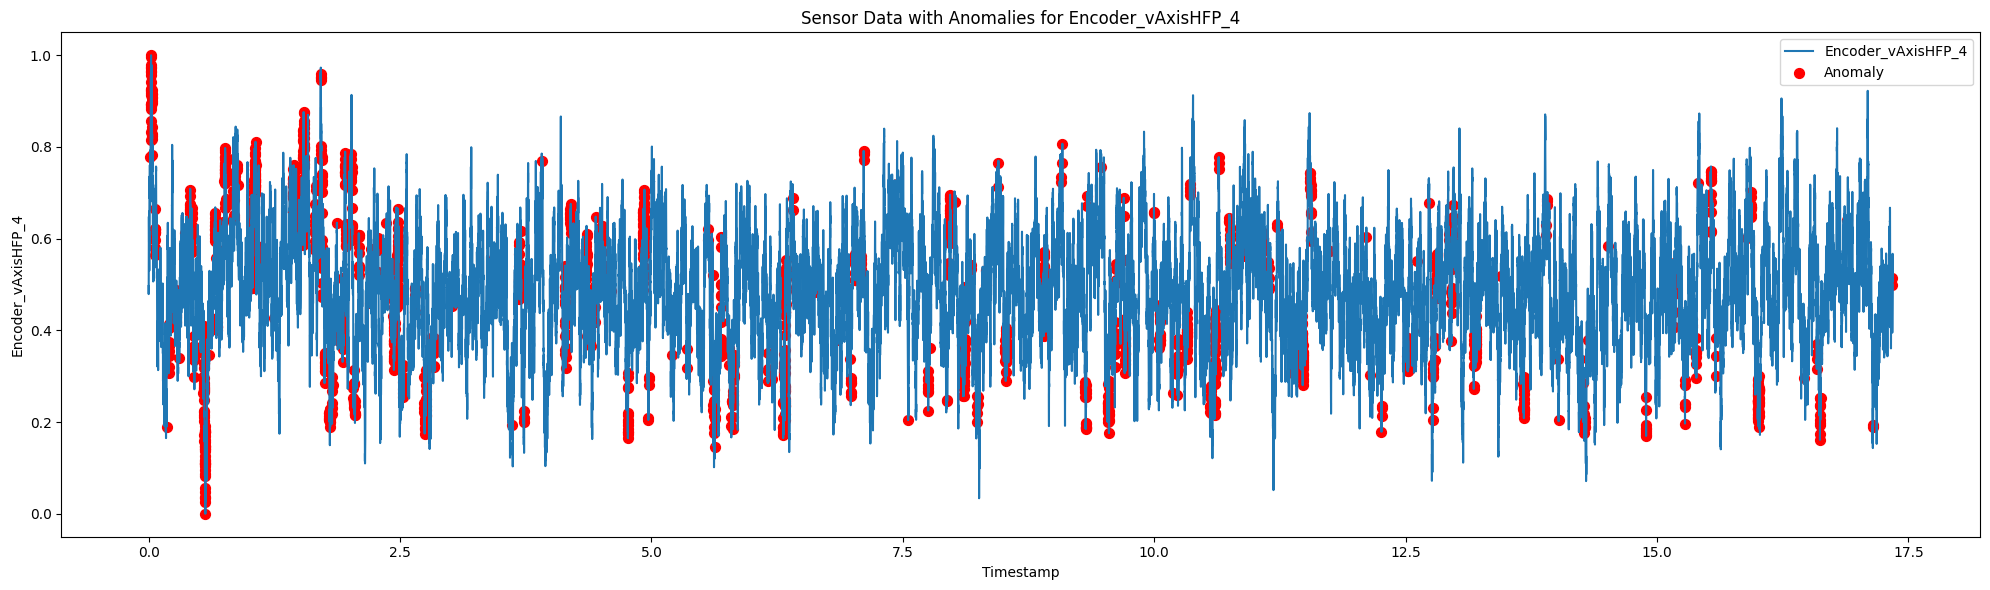

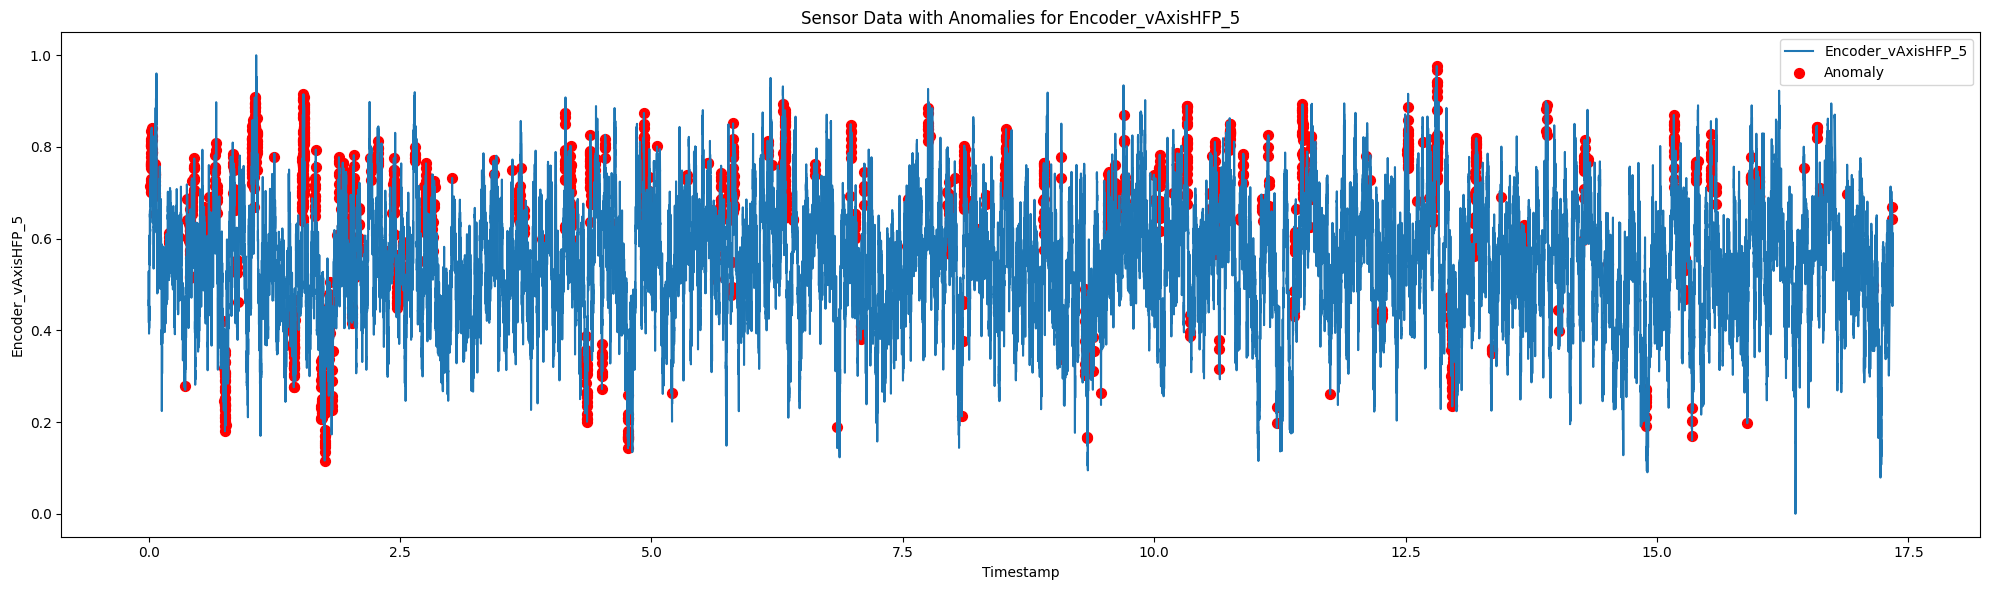

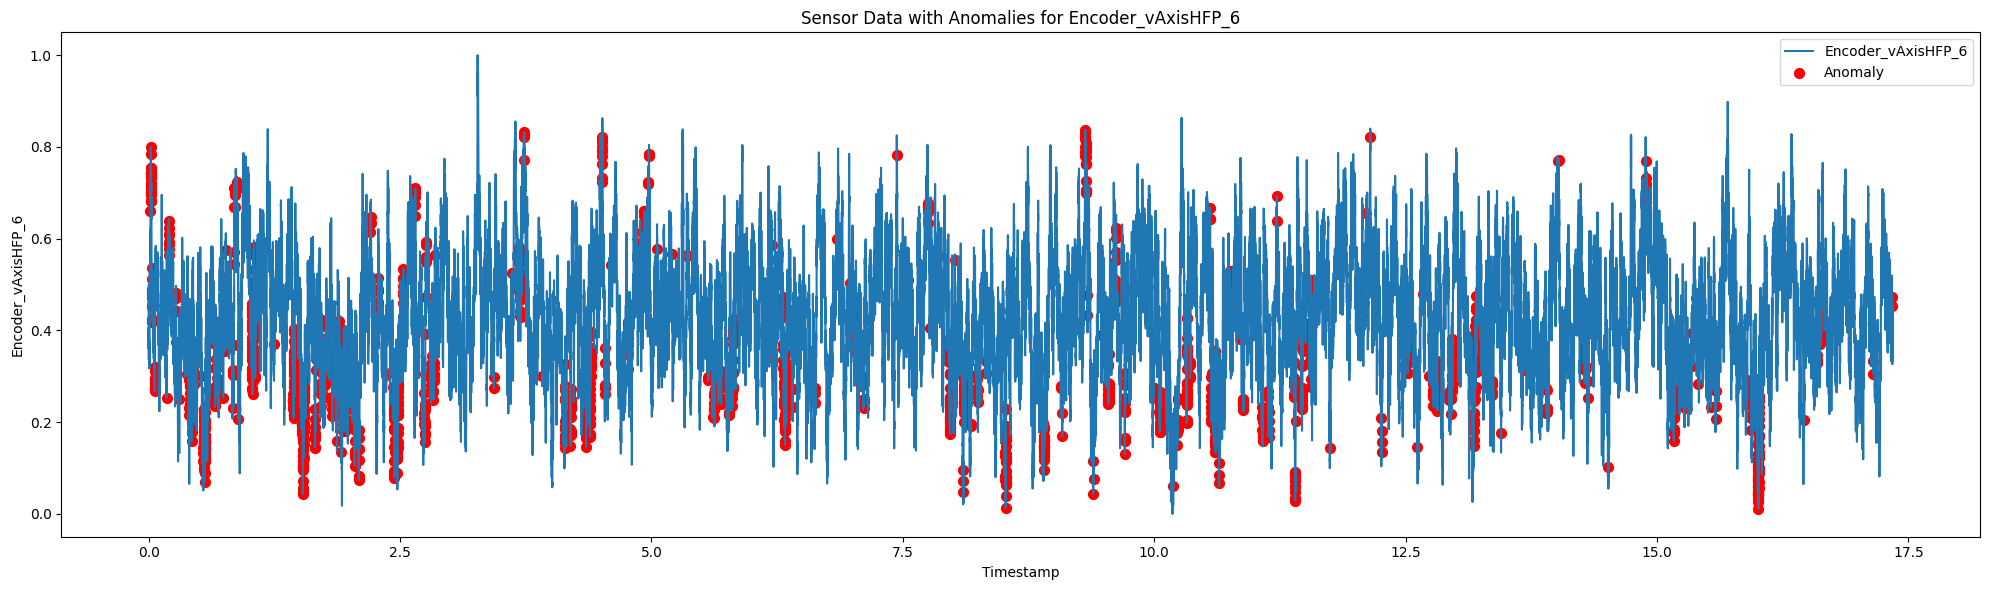

In [17]:
for i in range(len(sensor_cols)):
    plt.figure(figsize=(20, 6))
    plt.plot(df2_mm['Time'], df2_mm[sensor_cols[i]], label=sensor_cols[i])
    plt.scatter(
        df2_mm.loc[df2_mm['is_anomaly'], 'Time'],
        df2_mm.loc[df2_mm['is_anomaly'], sensor_cols[i]],
        color='red',
        label='Anomaly',
        s=50
    )
    plt.xlabel('Timestamp')
    plt.ylabel(sensor_cols[i])
    plt.title(f'Sensor Data with Anomalies for {sensor_cols[i]}')
    plt.legend()
    plt.tight_layout()
    plt.show()

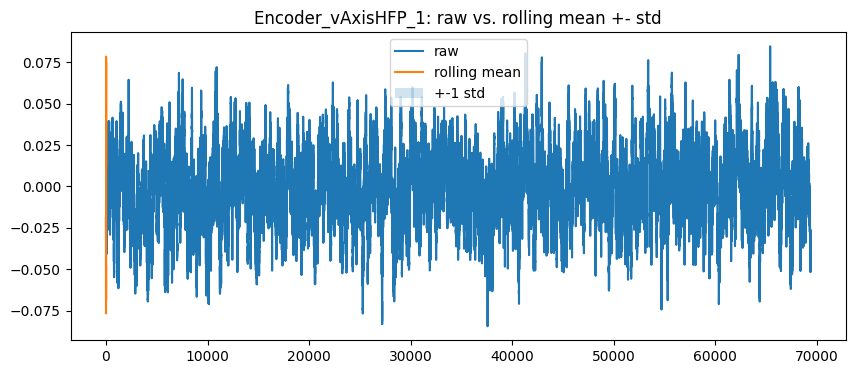

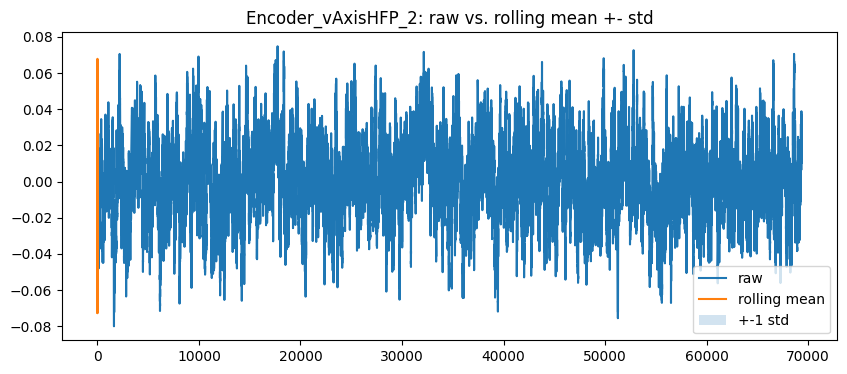

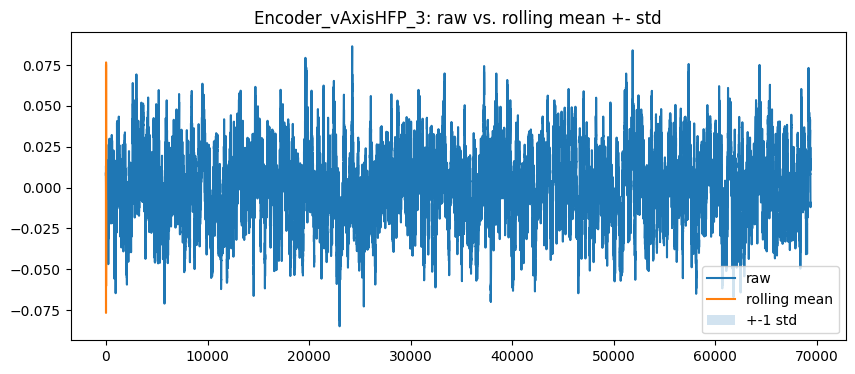

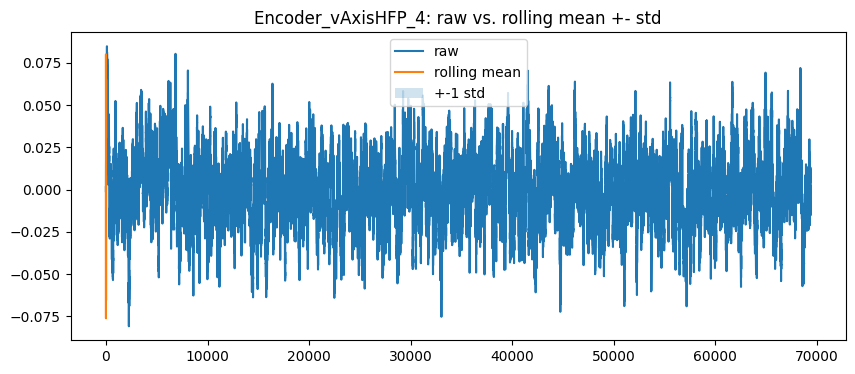

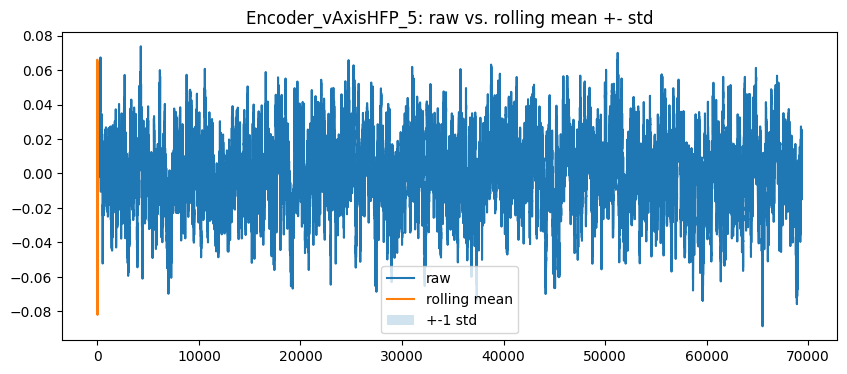

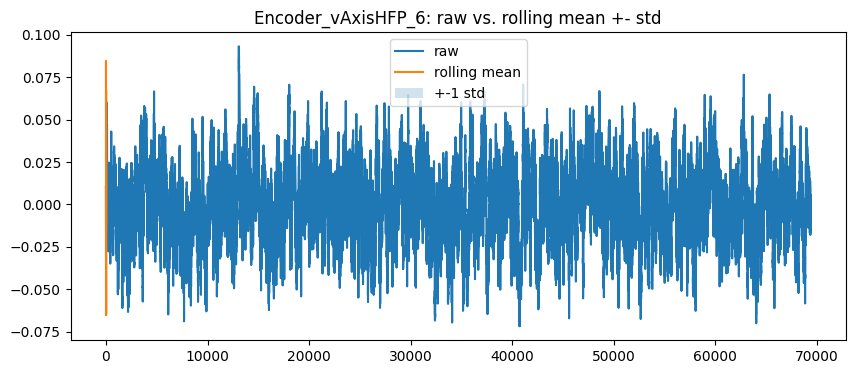

In [18]:
window = 10

# Compute rolling mean and std for all sensors:
rolling_mean = df2.rolling(window=window, min_periods=1, center=False, on='Time').mean()
rolling_std = df2.rolling(window=window, min_periods=1, center=False, on='Time').std()

#  Other aggregations:
rolling_median = df2.rolling(window, min_periods=1, on='Time').median()
rolling_quantile = df2.rolling(window, min_periods=1, on='Time').quantile(0.95)
rolling_var = df2.rolling(window, min_periods=1, on='Time').var()

for sensor in sensor_cols:    
    plt.figure(figsize=(10,4))
    plt.plot(df2.index, df2[sensor], label='raw')
    plt.plot(rolling_mean['Time'], rolling_mean[sensor], label='rolling mean')
    plt.fill_between(rolling_mean.index,
                    rolling_mean[sensor] - rolling_std[sensor],
                    rolling_mean[sensor] + rolling_std[sensor],
                    alpha=0.2, label='+-1 std')
    plt.legend()
    plt.title(f'{sensor}: raw vs. rolling mean +- std')
    plt.show()

That doesnt look right

In [19]:
p1 = df2[sensor_cols].quantile(0.01)
p99 = df2[sensor_cols].quantile(0.99)

low_pts = df2[sensor_cols + ['Time']].copy()
high_pts = df2[sensor_cols + ['Time']].copy()
for sensor in sensor_cols:
    low_pts[sensor]  = df2[sensor][df2[sensor] <= p1[sensor]]
    high_pts[sensor] = df2[sensor][df2[sensor] >= p99[sensor]]

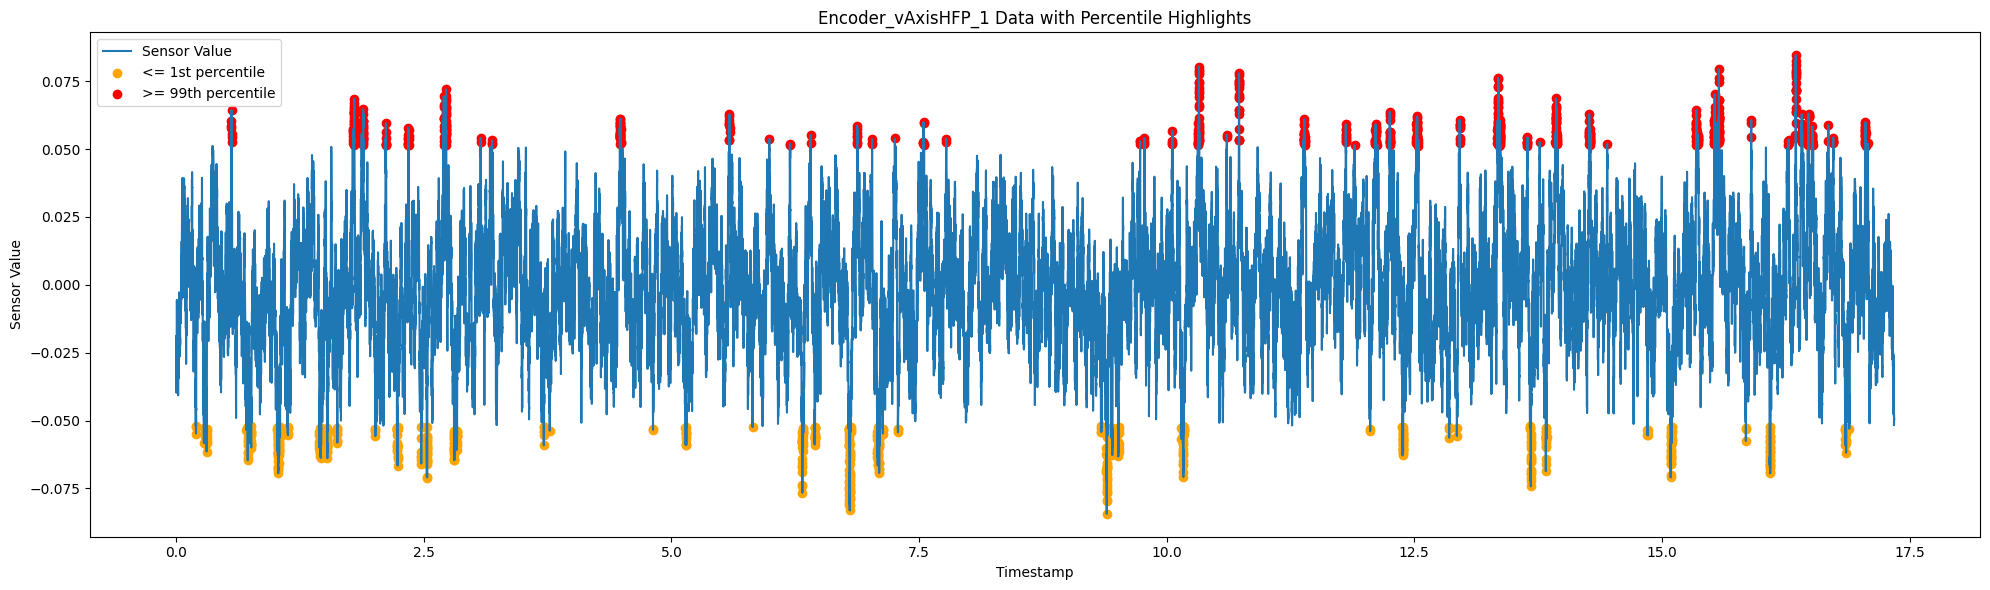

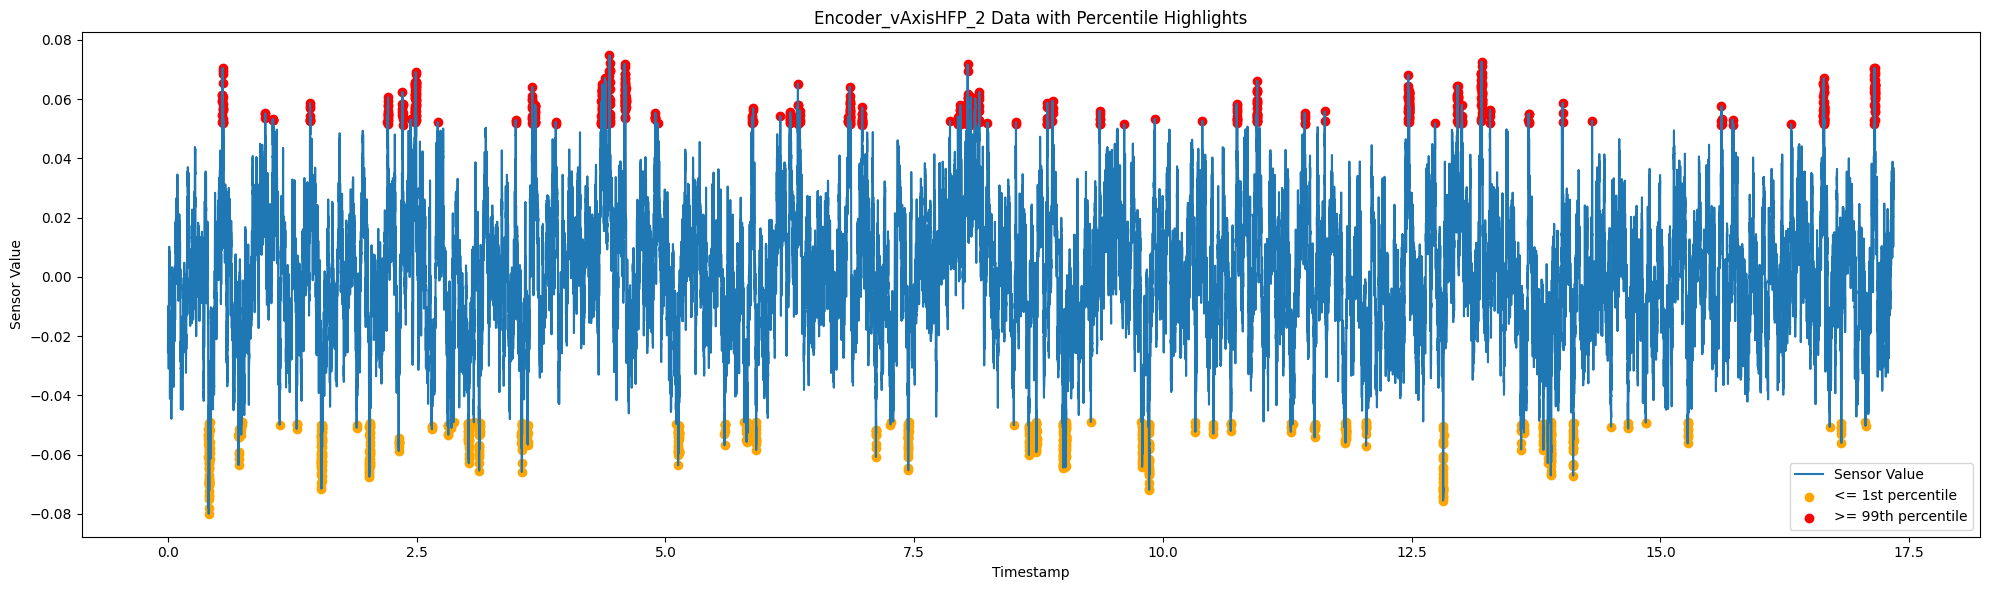

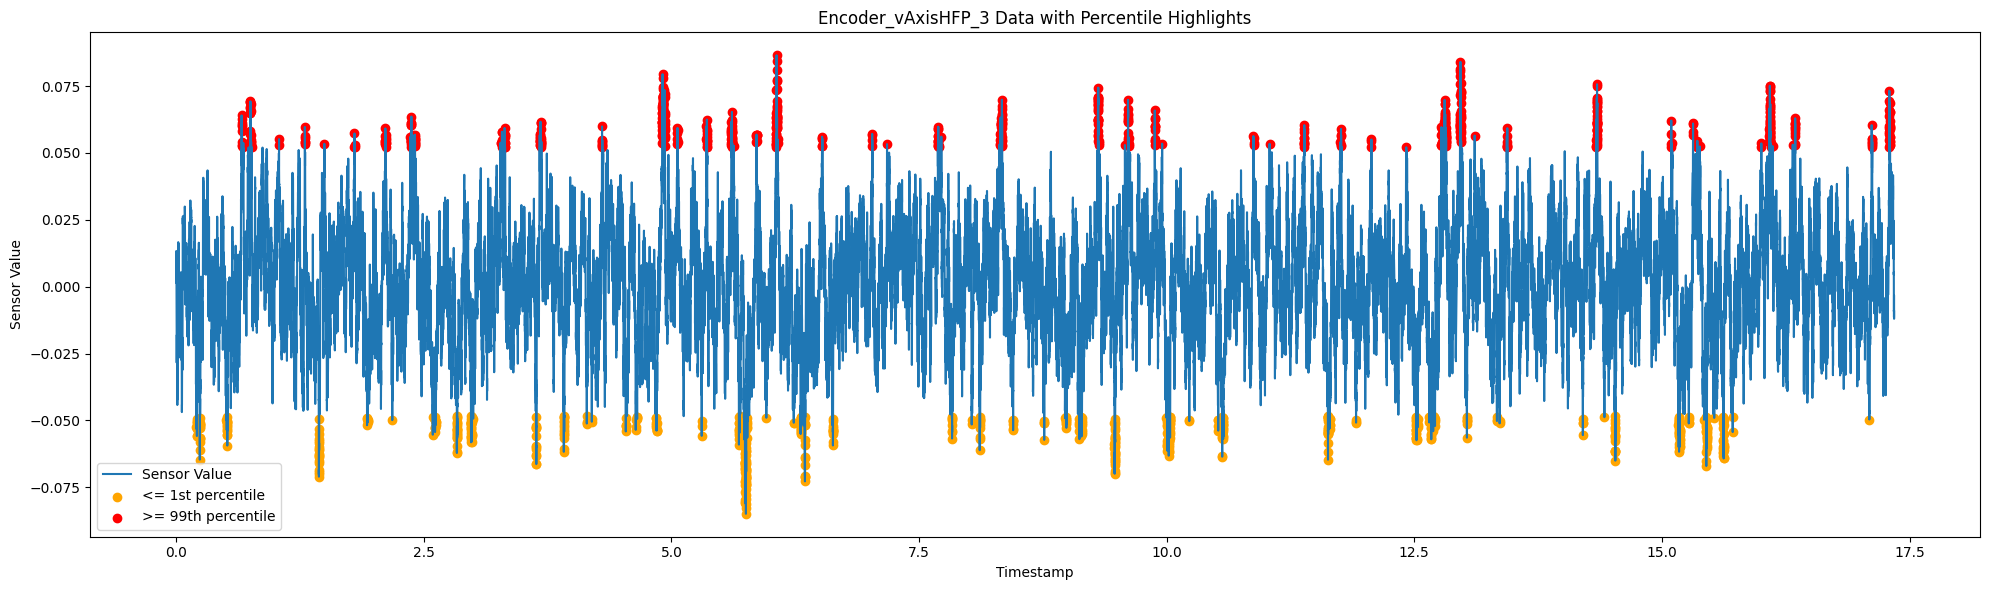

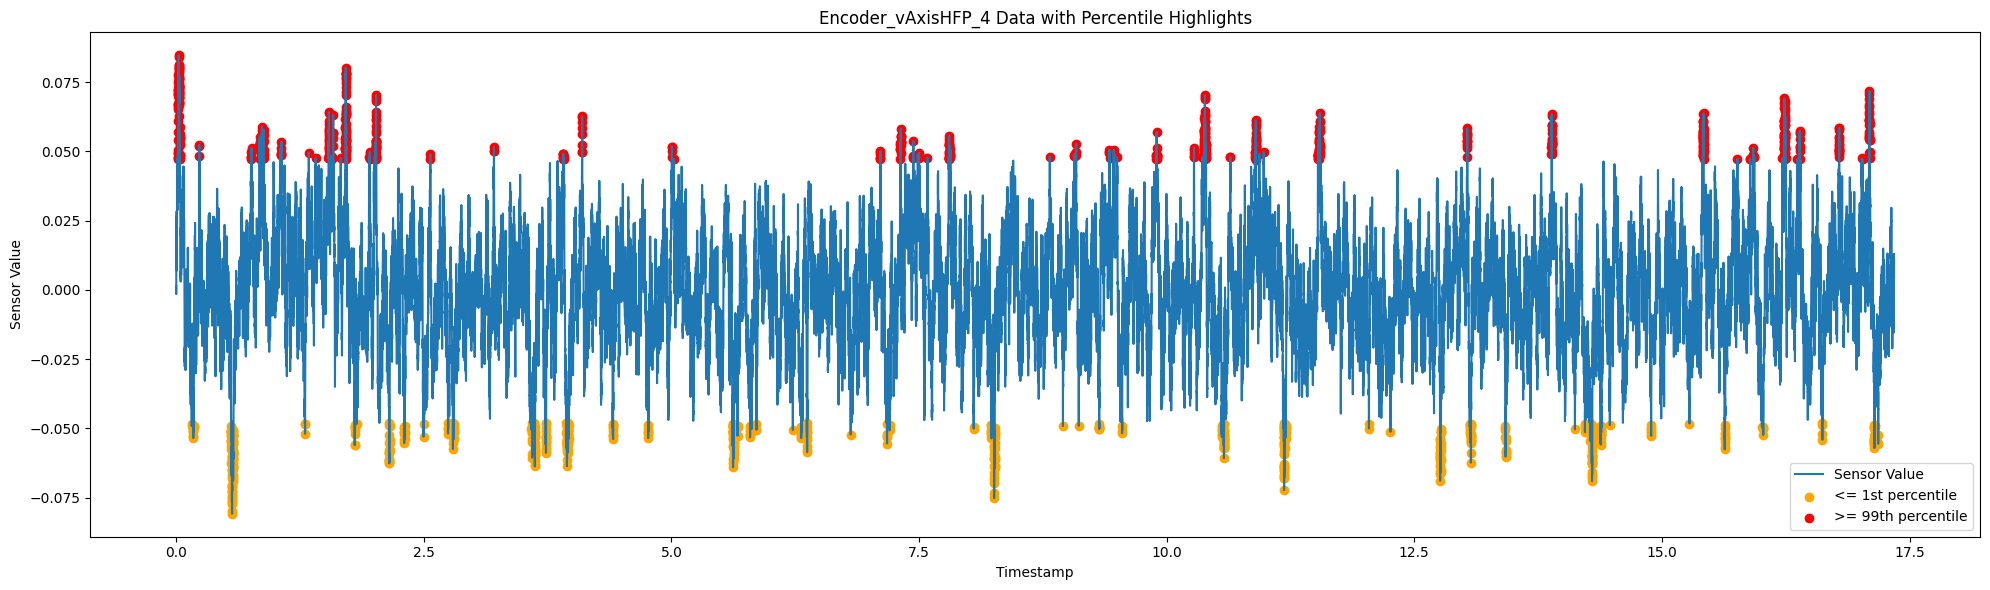

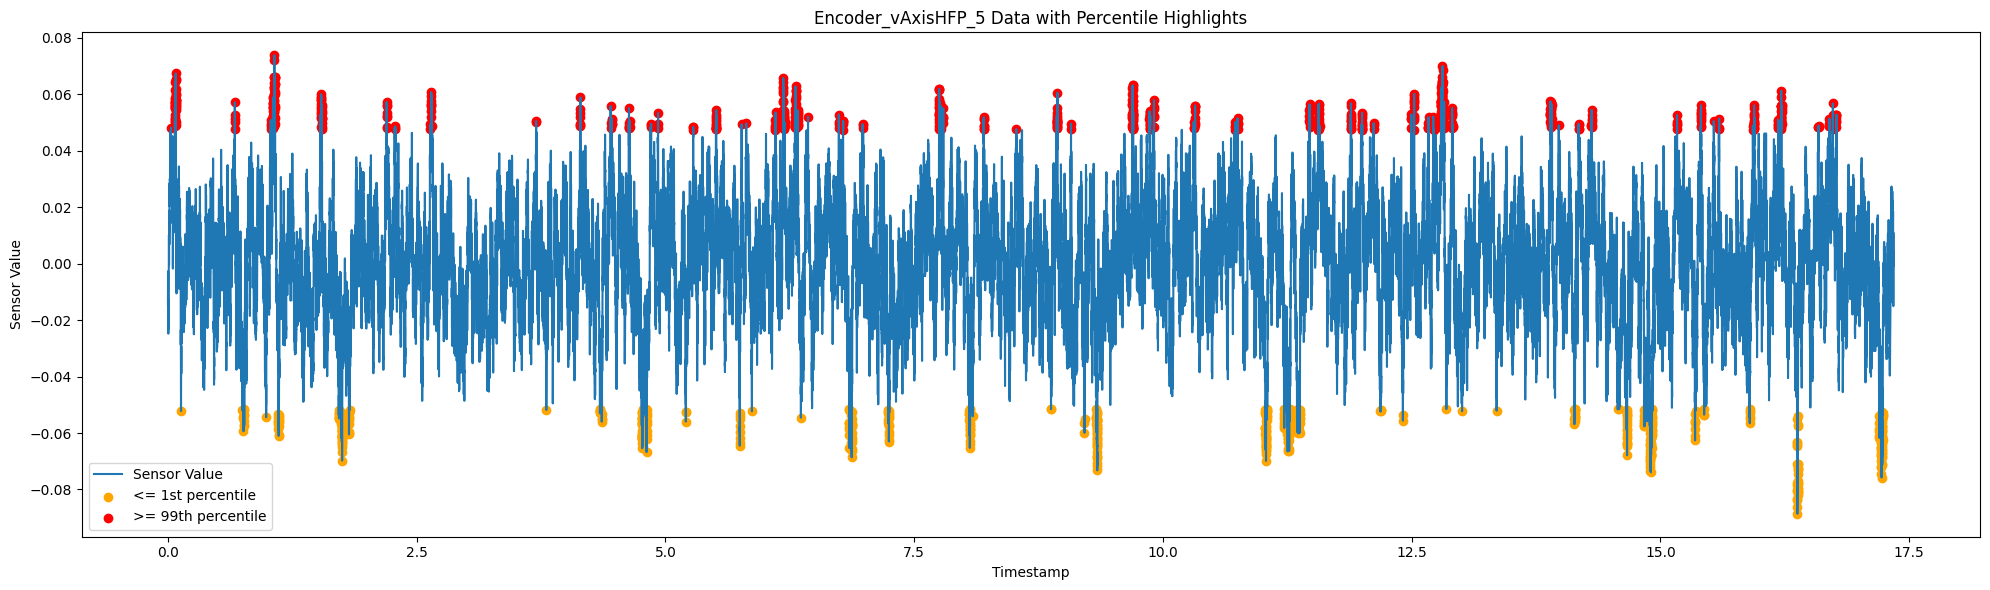

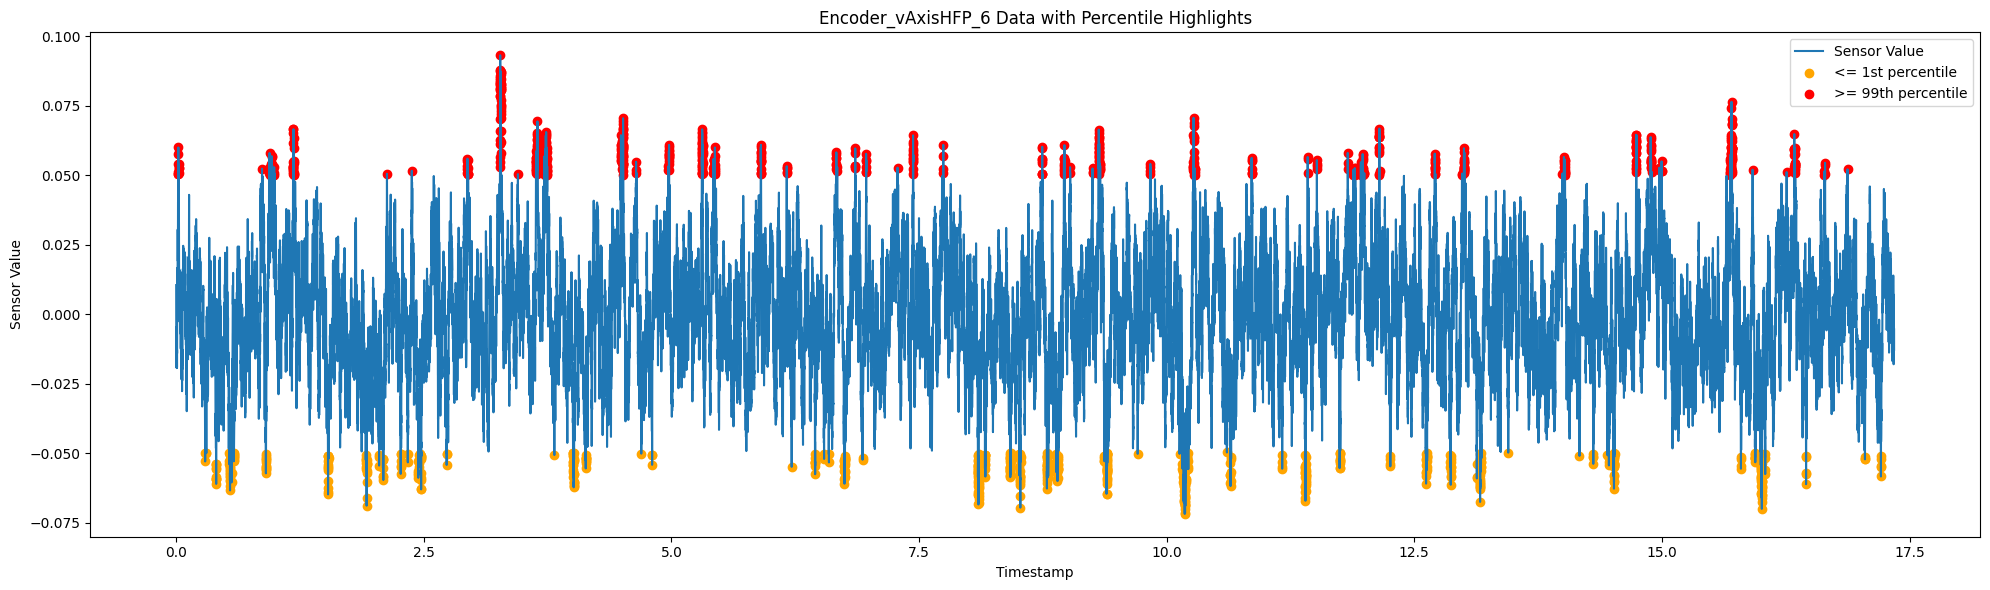

In [20]:
for sensor in sensor_cols:
    plt.figure(figsize=(20, 6))
    plt.plot(df2['Time'], df2[sensor], label='Sensor Value')
    plt.scatter(low_pts['Time'],  low_pts[sensor],  marker='o', color='orange', label='<= 1st percentile')
    plt.scatter(high_pts['Time'], high_pts[sensor], marker='o', color='red', label='>= 99th percentile')
    plt.xlabel('Timestamp')
    plt.ylabel('Sensor Value')
    plt.title(sensor + ' Data with Percentile Highlights')
    plt.legend()
    plt.tight_layout()
    plt.show()


### Reinforcement Learning

In [21]:
# import gymnasium as gym
# import numpy as np
# import pandas as pd
# from gymnasium import spaces
# from stable_baselines3 import PPO

# class AnomalyEnv(gym.Env):
#     '''
#     A simple Gym env where at each time-step the agent sees the current sensor
#     reading (or a window of readings) and must output 0=normal or 1=anomaly.
#     Rewards are +1 for a correct flag, -1 for an incorrect one.
#     '''
#     metadata = {'render.modes': []}

#     def __init__(self, df, window_size=1):
#         super().__init__()
#         # df must have columns ['sensor1',...,'sensorN','is_anomaly']
#         self.window_size = window_size
#         self.data = df.reset_index(drop=True)
#         self.max_steps = len(df) - window_size
#         # Observation: window_size × N_sensors
#         n_sensors = df.filter(regex='^sensor').shape[1]
#         self.observation_space = spaces.Box(
#             low=-np.inf, high=np.inf,
#             shape=(window_size, n_sensors), dtype=np.float32
#         )
#         # Action: 0 or 1
#         self.action_space = spaces.Discrete(2)
#         self.reset()

#     def reset(self):
#         self.ptr = 0
#         return self._get_obs()

#     def _get_obs(self):
#         slice_ = self.data.loc[self.ptr:self.ptr+self.window_size-1,
#                                self.data.filter(regex='^sensor').columns]
#         return slice_.values.astype(np.float32)

#     def step(self, action):
#         # Ground-truth label is at the last point in window
#         true_label = int(self.data.loc[self.ptr + self.window_size - 1, 'is_anomaly'])
#         reward = 1 if action == true_label else -1
#         self.ptr += 1
#         done = (self.ptr > self.max_steps)
#         obs = self._get_obs() if not done else np.zeros_like(self._get_obs())
#         return obs, reward, done, {}


# env = AnomalyEnv(df2, window_size=5)

# # Create and train a PPO agent
# model = PPO(
#     policy='MlpPolicy',
#     env=env,
#     verbose=1,
#     learning_rate=3e-4,
#     n_steps=2048,
#     batch_size=64,
#     ent_coef=0.01,
#     device='auto'
# )
# model.learn(total_timesteps=50_000)

# # Evaluate the trained agent
# obs = env.reset()
# correct = 0
# total = 0
# done = False
# while not done:
#     action, _ = model.predict(obs, deterministic=True)
#     _, reward, done, _ = env.step(action)
#     correct += (reward > 0)
#     total += 1

# print(f'Accuracy over episode: {correct/total:.2%}')


### Transformer Autoencoder

In [35]:
# split pooled into train/val/test
from sklearn.model_selection import train_test_split

X_train, X_val = train_test_split(pooled[sensor_cols], test_size=0.1, random_state=1, shuffle=True)
X_test = df2_mm[sensor_cols]

print('Train shape:', X_train.shape)
print('Validation shape:', X_val.shape)
print('Test shape:', X_test.shape)

Train shape: (183420, 6)
Validation shape: (20380, 6)
Test shape: (69377, 6)


In [36]:
T = 30  # length of the sliding window

def make_windows(data, window_size):
    # returns array of shape (n_time - T + 1, T, n_sensors)
    return np.stack([
        data[i : i + window_size]
        for i in range(len(data) - window_size + 1)
    ], axis=0)

X_train_tensor = make_windows(X_train, T)
X_val_tensor = make_windows(X_val, T)
X_test_tensor = make_windows(X_test, T)
print('Shape of train:', X_train_tensor.shape)
print('Shape of validation:', X_val_tensor.shape)
print('Shape of test:', X_test_tensor.shape)


Shape of train: (183391, 30, 6)
Shape of validation: (20351, 30, 6)
Shape of test: (69348, 30, 6)


In [37]:
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.optimizers import Adam

# Hyperparameters          
n_sensors = 6   # number of sensor channels
d_model = 64    # transformer hidden dimension
n_heads = 4     # attention heads
d_ff = 128      # feed-forward hidden dim
n_layers = 2    # number of encoder/decoder blocks

# Positional Encoding
def get_positional_encoding(T, d_model):
    pos = np.arange(T)[:, None]
    i   = np.arange(d_model)[None, :]
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
    angle_rads = pos * angle_rates
    # apply sin to even indices; cos to odd
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    angle_rads = angle_rads[np.newaxis, ...]            # now shape = (1, T, d_model)
    return tf.constant(angle_rads, dtype=tf.float32)

# Transformer block (single)
def transformer_block(x, mask=None):
    # multi-head self-attn
    attn_out = layers.MultiHeadAttention(
        num_heads=n_heads, key_dim=d_model // n_heads
    )(x, x, attention_mask=mask)
    x = layers.Add()([x, attn_out])
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    # feed-forward
    ff = layers.Dense(d_ff, activation='relu')(x)
    ff = layers.Dense(d_model)(ff)
    x = layers.Add()([x, ff])
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x

# Build the Transformer Autoencoder
# 1) Inputs: raw sensor windows, shape=(T, n_sensors)
inp = Input(shape=(T, n_sensors), name='sensor_window')

# 2) Project sensors up to d_model, and add positional encoding
proj = layers.Dense(d_model)(inp)   # (batch, T, d_model)
pos_enc = get_positional_encoding(T, d_model)
x = layers.Add()([proj, pos_enc])

# 3) Encoder: stack of self-attn blocks
for _ in range(n_layers):
    x = transformer_block(x)
encoded_seq = x  # shape (batch, T, d_model)

# 4) Bottleneck: optionally you could pool to a vector, 
#    but here we keep full seq for decoding
#    (for anomaly detection you may compute reconstruction error on the full sequence)

# 5) Decoder: same architecture, attending only to itself
y = encoded_seq
for _ in range(n_layers):
    y = transformer_block(y)
decoded = layers.Dense(n_sensors, name='reconstruction')(y)  # back to sensor dims

# 6) Model & compile
model = Model(inputs=inp, outputs=decoded, name='Transformer_AE')
model.compile(optimizer=Adam(1e-4), loss='mse')
model.summary()

# --- Train ---
model.fit(X_train_tensor, X_train_tensor, validation_data=(X_val_tensor, X_val_tensor), epochs=4, batch_size=30)

# --- Anomaly scoring ---
X_pred = model.predict(X_test_tensor)
mse = np.mean((X_test_tensor - X_pred)**2, axis=(1,2))
threshold = np.percentile(mse, 99)
anomalies = mse > threshold


Model: "Transformer_AE"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ sensor_window (InputLayer)    │ (None, 30, 6)             │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_9 (Dense)               │ (None, 30, 64)            │             448 │ sensor_window[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_9 (Add)                   │ (1, 30, 64)               │               0 │ dense_9[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multi_head_attention_4        │ (1, 30, 64)               │          16,640 │ add_9[0][0], add_9[0][0]   │
│ (MultiHeadAttention)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_10 (Add)                  │ (1, 30, 64)               │               0 │ add_9[0][0],               │
│                               │                           │                 │ multi_head_attention_4[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization_8         │ (1, 30, 64)               │             128 │ add_10[0][0]               │
│ (LayerNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_10 (Dense)              │ (1, 30, 128)              │           8,320 │ layer_normalization_8[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_11 (Dense)              │ (1, 30, 64)               │           8,256 │ dense_10[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_11 (Add)                  │ (1, 30, 64)               │               0 │ layer_normalization_8[0][… │
│                               │                           │                 │ dense_11[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization_9         │ (1, 30, 64)               │             128 │ add_11[0][0]               │
│ (LayerNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multi_head_attention_5        │ (1, 30, 64)               │          16,640 │ layer_normalization_9[0][… │
│ (MultiHeadAttention)          │                           │                 │ layer_normalization_9[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_12 (Add)                  │ (1, 30, 64)               │               0 │ layer_normalization_9[0][… │
│                               │                           │                 │ multi_head_attention_5[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization_10        │ (1, 30, 64)               │             128 │ add_12[0][0]               │
│ (LayerNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 134,726 (526.27 KB)

 Trainable params: 134,726 (526.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/4
6114/6114 ━━━━━━━━━━━━━━━━━━━━ 157s 24ms/step - loss: 0.0288 - val_loss: 5.0487e-05
Epoch 2/4
6114/6114 ━━━━━━━━━━━━━━━━━━━━ 134s 22ms/step - loss: 4.9195e-05 - val_loss: 4.1002e-05
Epoch 3/4
6114/6114 ━━━━━━━━━━━━━━━━━━━━ 143s 23ms/step - loss: 2.6215e-05 - val_loss: 1.7375e-05
Epoch 4/4
6114/6114 ━━━━━━━━━━━━━━━━━━━━ 150s 25ms/step - loss: 1.8084e-05 - val_loss: 9.0422e-06
2168/2168 ━━━━━━━━━━━━━━━━━━━━ 30s 14ms/step


In [38]:
X_test['is_anomaly'] = False
for i in range(anomalies.shape[0]):
    if X_test['is_anomaly'][i]:
        continue  # skip if already marked
    if anomalies[i]:
        X_test.loc[i:i+T-1, 'is_anomaly'] = True  # mark as anomaly
    
X_test.loc[X_test['is_anomaly'] == True]

C:\Users\ashut\AppData\Local\Temp\ipykernel_29108\1171575997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['is_anomaly'] = False


Encoder_vAxisHFP_1  Encoder_vAxisHFP_2  Encoder_vAxisHFP_3  \
66               0.431278            0.405189            0.341910   
67               0.457390            0.388342            0.418699   
68               0.460706            0.369821            0.448552   
69               0.449349            0.411614            0.439482   
70               0.412988            0.417000            0.427860   
...                   ...                 ...                 ...   
64048            0.600938            0.388545            0.742934   
64049            0.614562            0.409111            0.713339   
64050            0.642021            0.396503            0.698561   
64051            0.643463            0.387263            0.685851   
64052            0.625809            0.396648            0.716948   

       Encoder_vAxisHFP_4  Encoder_vAxisHFP_5  Encoder_vAxisHFP_6  is_anomaly  
66               0.752722            0.710543            0.599816        True  
67               0.751760            0.675115            0.566609        True  
68               0.769250            0.670548            0.560973        True  
69               0.786497            0.690143            0.551263        True  
70               0.771328            0.720872            0.573563        True  
...                   ...                 ...                 ...         ...  
64048            0.295023            0.653379            0.276014        True  
64049            0.290331            0.681504            0.261266        True  
64050            0.272882            0.726761            0.233337        True  
64051            0.301418            0.734444            0.251499        True  
64052            0.273553            0.692717            0.257849        True  

[1170 rows x 7 columns]

C:\Users\ashut\AppData\Local\Temp\ipykernel_29108\3828169165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Time'] = df2_mm['Time']


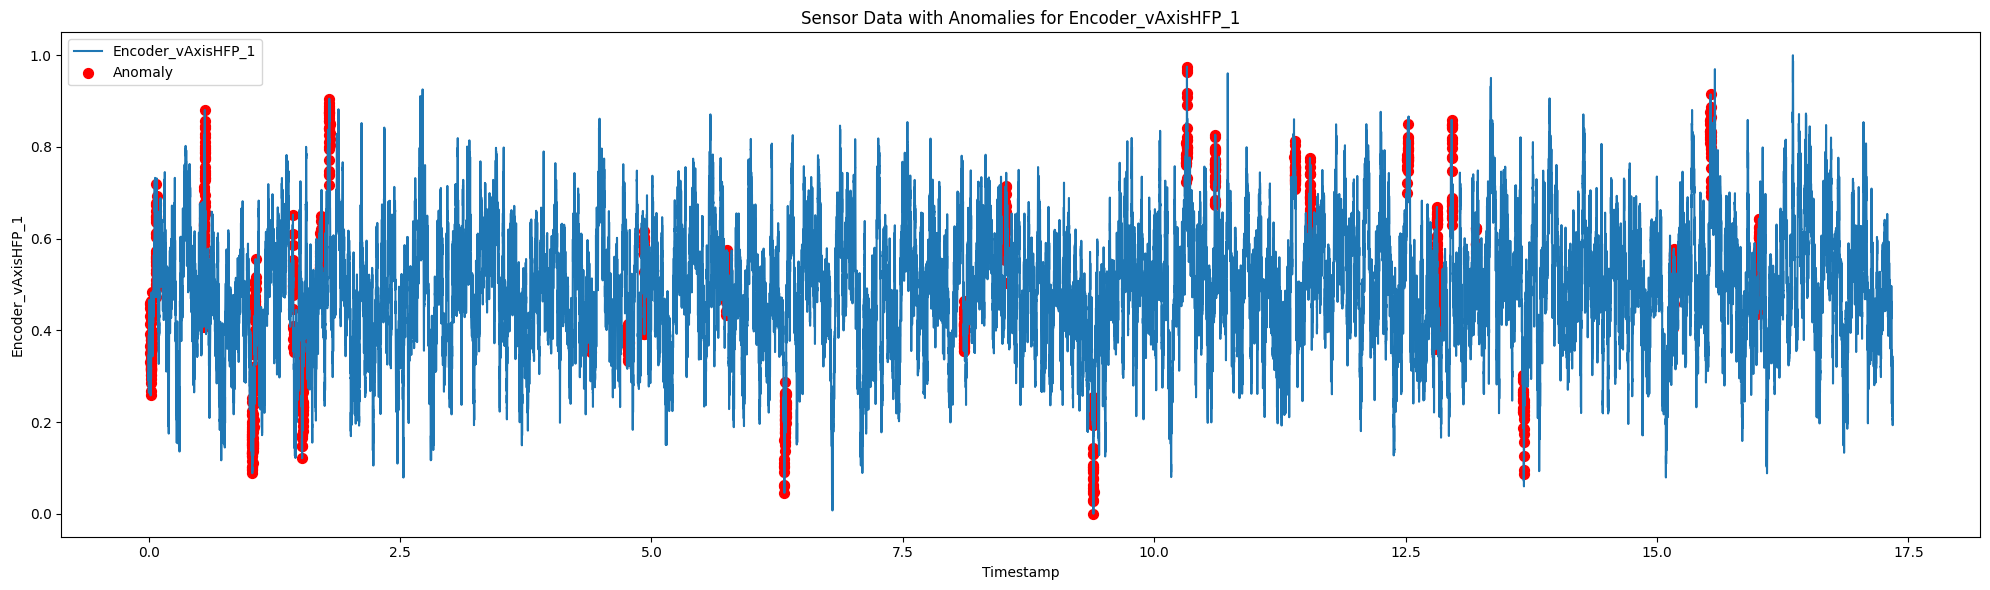

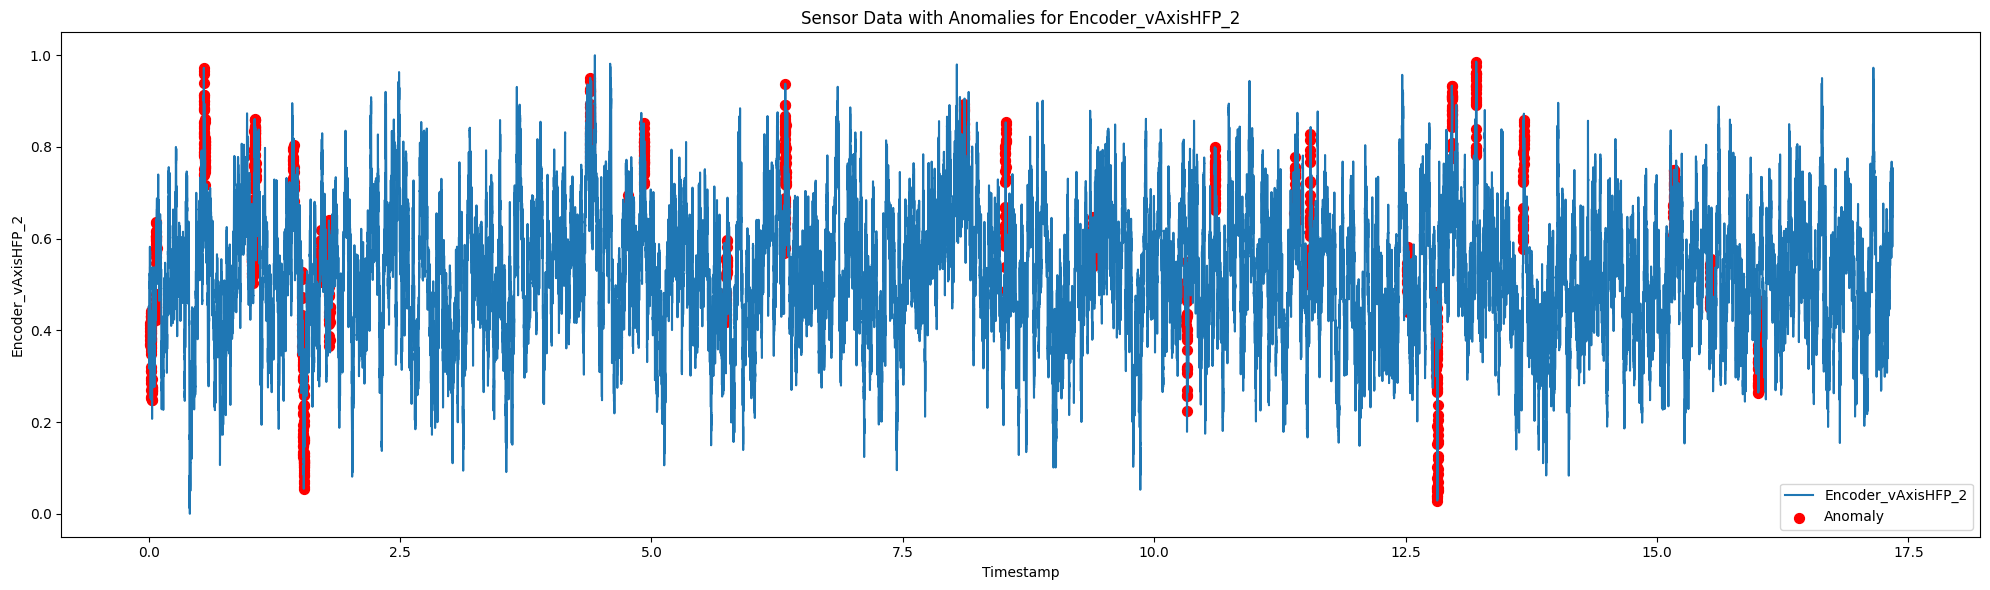

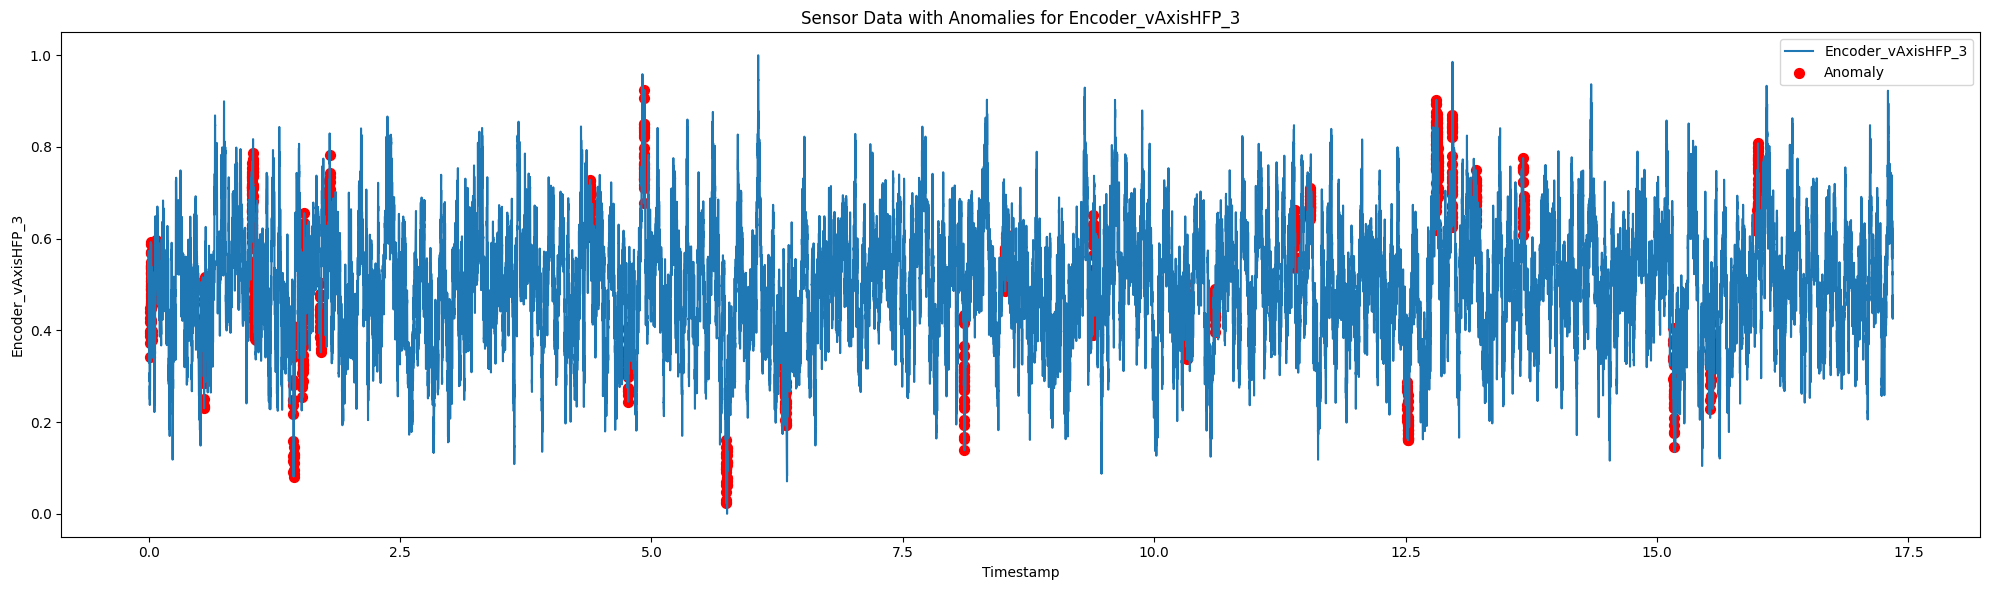

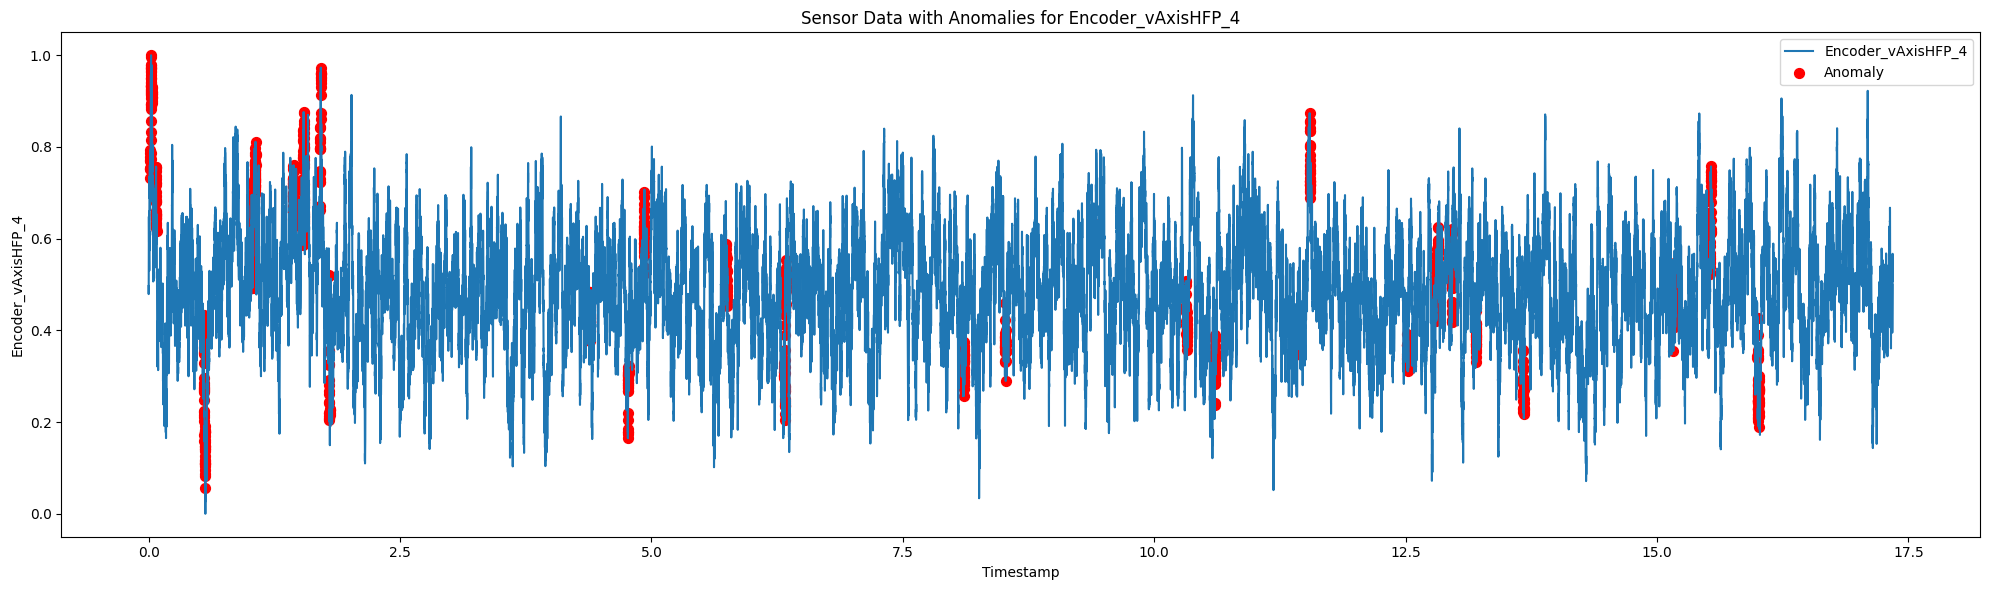

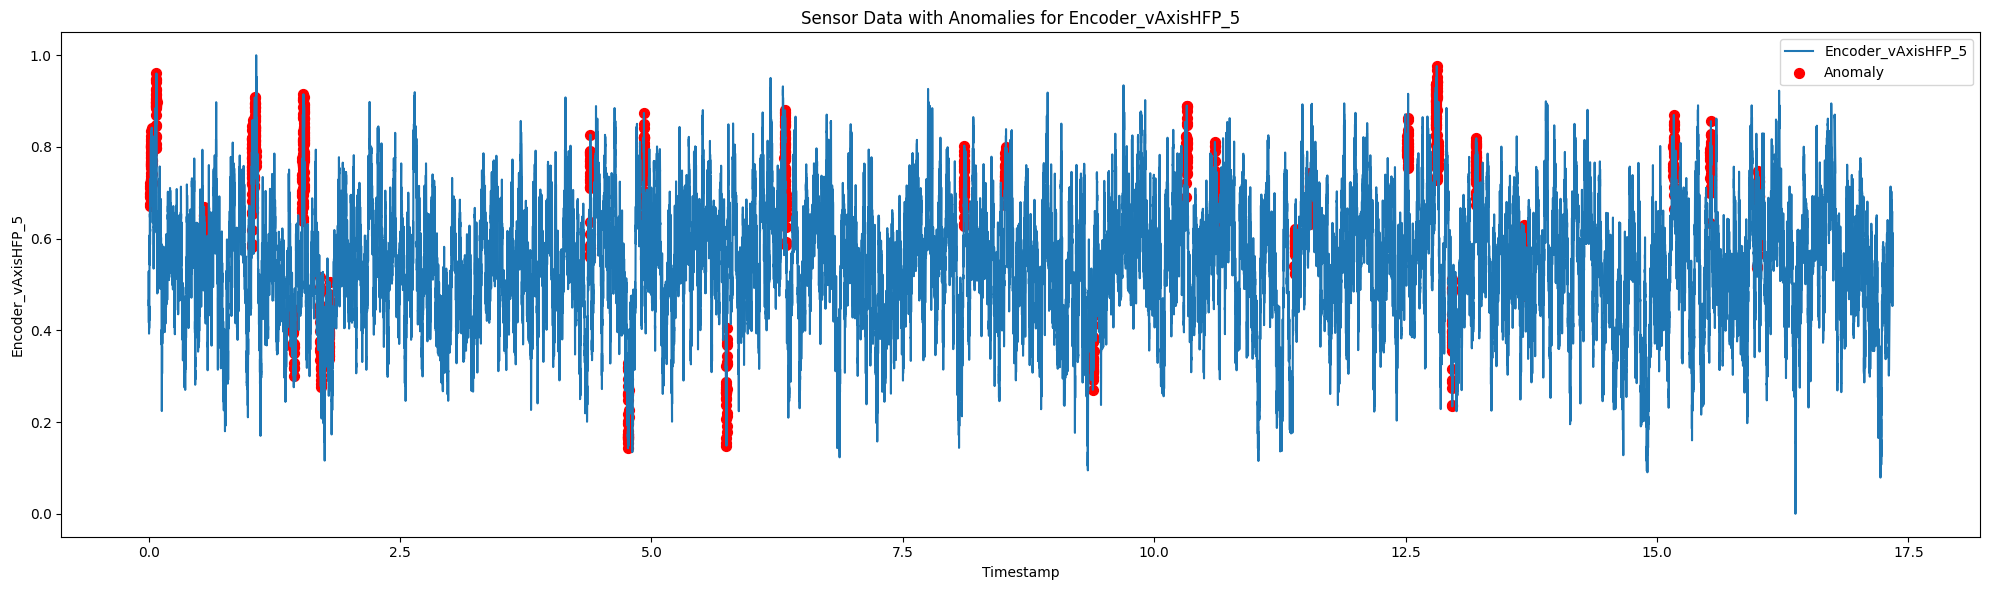

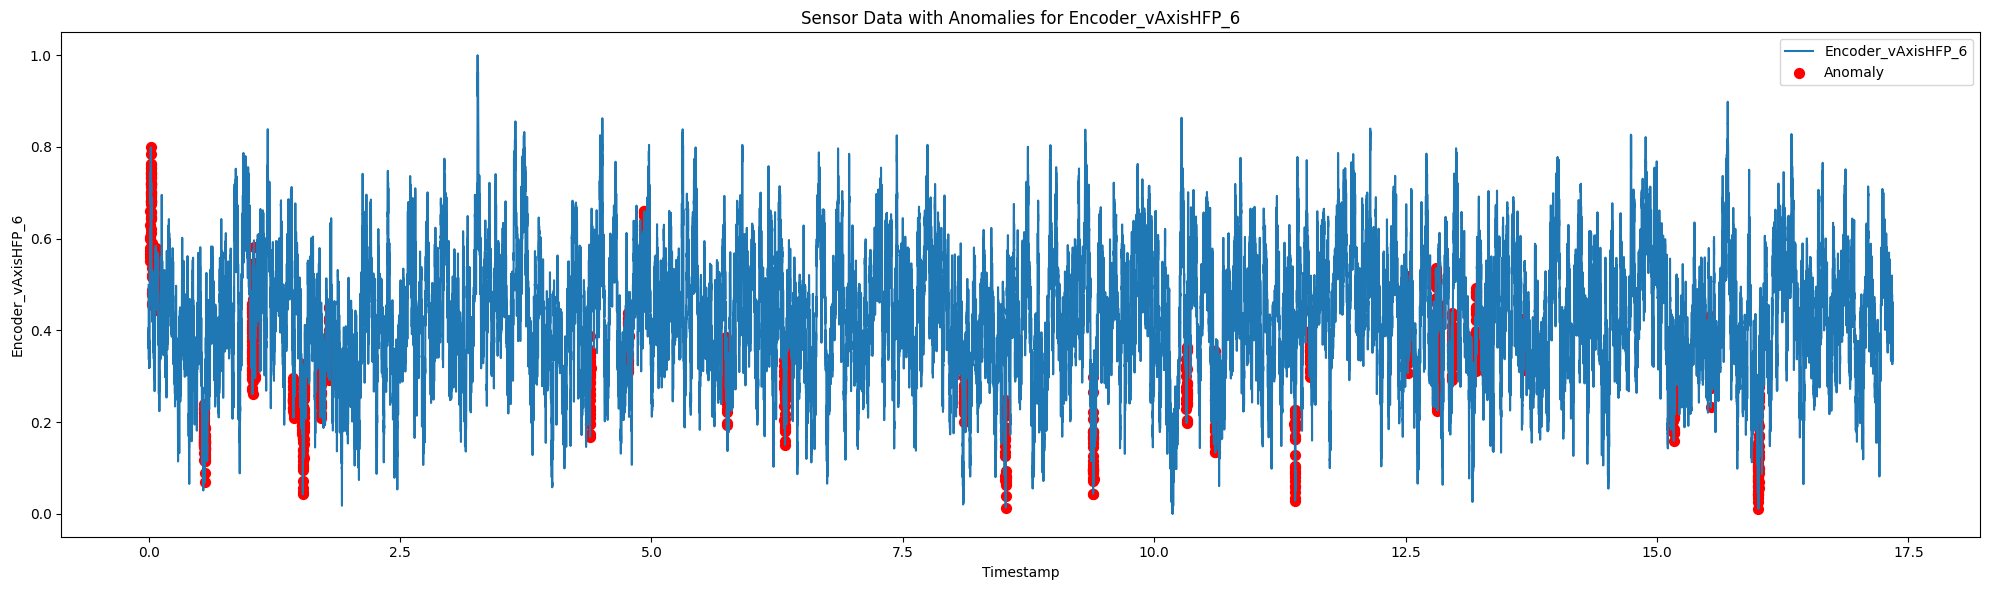

In [39]:
X_test['Time'] = df2_mm['Time']
for i in range(len(sensor_cols)):
    plt.figure(figsize=(20, 6))
    plt.plot(X_test['Time'], X_test[sensor_cols[i]], label=sensor_cols[i])
    plt.scatter(
        X_test.loc[X_test['is_anomaly'], 'Time'],
        X_test.loc[X_test['is_anomaly'], sensor_cols[i]],
        color='red',
        label='Anomaly',
        s=50
    )
    plt.xlabel('Timestamp')
    plt.ylabel(sensor_cols[i])
    plt.title(f'Sensor Data with Anomalies for {sensor_cols[i]}')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from IPython.display import display


# Window size (number of points to view at once)
window_size = 200

# Function to plot a sliding window of the time series
def plot_window(start=0):
    end = start + window_size
    sub = X_test.iloc[start:end]
    n = len(sensor_cols)
    fig, axes = plt.subplots(n, 1, sharex=True, figsize=(12, 3 * n))
    
    for ax, sensor in zip(axes, sensor_cols):
        ax.plot(sub['Time'], sub[sensor], label=sensor)
        if 'is_anomaly' in X_test:
            mask = sub['is_anomaly']
            ax.scatter(
                sub.loc[mask, 'Time'],
                sub.loc[mask, sensor],
                color='red',
                s=30,
                label='Anomaly'
            )
        ax.set_ylabel(sensor)
        ax.legend(loc='upper right')
    
    axes[-1].set_xlabel('Time')
    fig.suptitle(
        f"Time {sub['Time'].iloc[0]} → {sub['Time'].iloc[-1]}",
        y=1.02
    )
    plt.tight_layout()
    plt.show()

# Create an interactive slider to move the window

slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(X_test) - window_size,
    step=1,
    description='Start Index'
)

widgets.interact(plot_window, start=slider)


interactive(children=(IntSlider(value=0, description='Start Index', max=69177), Output()), _dom_classes=('widg…

<function __main__.plot_window(start=0)>

### Inject Synthetic Anomalies


In [43]:
# re create split
X_train, X_val = train_test_split(pooled, test_size=0.1, random_state=1, shuffle=True)
X_train, X_test = train_test_split(X_train, test_size=0.1, random_state=1, shuffle=True)

print('Train shape:', X_train.shape)
print('Validation shape:', X_val.shape)
print('Test shape:', X_test.shape)

Train shape: (165078, 7)
Validation shape: (20380, 7)
Test shape: (18342, 7)


In [44]:
def inject_anomalies(
    df: pd.DataFrame,
    sensor_cols=None,
    frac=0.10,
    shares=None,                # fraction of anomalous rows per type
    zero_eps=1e-3,              # near-zero noise level
    spike_sigma=5.0,            # how many stds above/below mean for spikes
    multi_k=(2, 4),             # range of #sensors to alter for multi-sensor events
    drift_seg_len=(20, 200),    # min/max length (rows) per drift segment
    drift_sigma=(1.0, 3.0),     # per-sensor drift amplitude in std units
    random_state=1
):
    """
    Injects anomalies and returns a modified copy plus a small report dict.

    Adds columns:
      - is_anomaly: bool
      - anomaly_types: str (semicolon-separated types affecting the row)
      - anomaly_sensors: str (comma-separated sensor names changed in the row)
      - drift_id: int segment id for global drift rows (or -1 if none)
    """
    rng = np.random.default_rng(random_state)
    out = df.copy()

    d = len(sensor_cols)
    n = len(out)
    n_anom = max(1, int(round(frac * n)))

    # How to split the 10% across anomaly types
    if shares is None:
        # roughly equal split across 4 types
        shares = {
            'zero_freeze': 0.33,
            'high_spike': 0.33,
            'multi_sensor': 0.33,
            # 'global_drift': 0.25, # Couldn't make this work well
        }

    # Precompute per-sensor stats for realistic spikes
    means = out[sensor_cols].mean()
    stds  = out[sensor_cols].std(ddof=0).replace(0, 1e-8)  # avoid div-by-zero

    # Book-keeping columns
    out['is_anomaly'] = False
    out['anomaly_types'] = ''
    out['anomaly_sensors'] = ''
    out['drift_id'] = -1

    used = dict(zip(X_test.index, [False]*len(X_test)))  # indices already altered (to avoid overlap)

    def _tag(idx, typ, cols):
        out.loc[idx, 'is_anomaly'] = True
        # merge/append tags if already present
        prev_t = out.loc[idx, 'anomaly_types']
        prev_c = str(out.loc[idx, 'anomaly_sensors'])
        new_t = typ if prev_t == '' else f'{prev_t};{typ}'
        if prev_c:
            new_c = ','.join(sorted(set(filter(None, (list(prev_c.split(','))) + cols))))
        else:
            new_c = ','.join(cols)
        out.loc[idx, 'anomaly_types'] = new_t
        out.loc[idx, 'anomaly_sensors'] = new_c

    report = {k: 0 for k in shares.keys()}
    details = {'zero_freeze': [], 'high_spike': [], 'multi_sensor': [], 'global_drift': []}

    # 1) ZERO or NEAR-ZERO on random sensor (per-row)
    n_zero = int(round(n_anom * shares['zero_freeze']))
    available = np.array([k for k, v in used.items() if not v])
    zero_rows = rng.choice(available, size=min(n_zero, len(available)), replace=False)
    for i in zero_rows:
        s = rng.choice(sensor_cols)
        out.at[i, s] = 0.0 + rng.normal(0, zero_eps)
        _tag(i, 'zero_freeze', [s])
    used.update(zip(zero_rows, [True]*len(zero_rows)))
    report['zero_freeze'] = len(zero_rows)
    details['zero_freeze'] = [(int(i), [s]) for i, s in zip(zero_rows, [out.loc[i, 'anomaly_sensors'] for i in zero_rows])]

    # 2) HIGH SPIKE on random sensor (per-row)
    n_spike = int(round(n_anom * shares['high_spike']))
    available = np.array([k for k, v in used.items() if not v])
    spike_rows = rng.choice(available, size=min(n_spike, len(available)), replace=False)
    for i in spike_rows:
        s = rng.choice(sensor_cols)
        sign = rng.choice([-1, 1])
        out.at[i, s] = means[s] + sign * spike_sigma * stds[s] + rng.normal(0, 0.1 * stds[s])
        _tag(i, 'high_spike', [s])
    used.update(zip(spike_rows, [True]*len(spike_rows)))
    report['high_spike'] = len(spike_rows)
    details['high_spike'] = [(int(i), [out.loc[i, 'anomaly_sensors']]) for i in spike_rows]

    # 3) MULTI-SENSOR spikes (per-row)
    n_multi = int(round(n_anom * shares['multi_sensor']))
    available = np.array([k for k, v in used.items() if not v])
    multi_rows = rng.choice(available, size=min(n_multi, len(available)), replace=False)
    for i in multi_rows:
        k = rng.integers(multi_k[0], min(multi_k[1], d) + 1)
        sensors = list(rng.choice(sensor_cols, size=k, replace=False))
        for s in sensors:
            sign = rng.choice([-1, 1])
            out.at[i, s] = means[s] + sign * (spike_sigma * 0.8 + rng.random() * spike_sigma * 0.4) * stds[s]
        _tag(i, 'multi_sensor', sensors)
    used.update(zip(multi_rows, [True]*len(multi_rows)))
    report['multi_sensor'] = len(multi_rows)
    details['multi_sensor'] = [(int(i), out.loc[i, 'anomaly_sensors'].split(',')) for i in multi_rows]

    # Couldn't make this work well
    # # 4) GLOBAL DRIFT (continuous increase/decrease across all sensors) 
    # # Allocate approximately the remaining anomaly budget in rows
    # n_drift_rows = max(0, n_anom - (len(zero_rows) + len(spike_rows) + len(multi_rows)))
    # drift_id = 0
    # rows_assigned = 0
    # attempts = 0
    # max_attempts = 10

    # # We treat df order as time order. Create segments that do not overlap used rows.
    # while rows_assigned < n_drift_rows and attempts < max_attempts:
    #     attempts += 1
    #     seg_len = int(rng.integers(drift_seg_len[0], drift_seg_len[1] + 1))
    #     if seg_len <= 0:
    #         continue
    #     # pick a start that has seg_len available and minimal overlap with used
    #     start = int(rng.integers(0, n - seg_len))
    #     seg_idx = np.arange(start, start + seg_len)

    #     # direction + amplitude per sensor
    #     direction = rng.choice([-1.0, 1.0])
    #     amps = {s: direction * (rng.uniform(drift_sigma[0], drift_sigma[1]) * stds[s]) for s in sensor_cols}
    #     ramp = np.linspace(0.0, 1.0, seg_len)  # 0 -> 1 (increase); negative handled by direction

    #     for t, idx in enumerate(seg_idx):
    #         for s in sensor_cols:
    #             out.at[idx, s] = out.at[idx, s] + amps[s] * ramp[t]
    #         _tag(idx, 'global_drift', sensor_cols)
    #         out.at[idx, 'drift_id'] = drift_id

    #     used[seg_idx] = True
    #     rows_assigned += seg_len
    #     report['global_drift'] += seg_len
    #     details['global_drift'].append({'drift_id': int(drift_id), 'start': int(start), 'len': int(seg_len),
    #                                     'direction': 'up' if direction > 0 else 'down'})
    #     drift_id += 1

    # Tidy anomaly_sensors formatting (empty -> '')
    out['anomaly_sensors'] = out['anomaly_sensors'].fillna('').astype(str)

    return out, {'counts': report, 'details': details, 'total_tagged_rows': int(out['is_anomaly'].sum())}


In [45]:
df_anom, info = inject_anomalies(X_test, sensor_cols=sensor_cols, frac=0.10, random_state=2)

print(info['counts'])              # rows per anomaly type (drift counted by rows covered)
print(info['total_tagged_rows'])   # total rows tagged as anomalous

# Your new columns:
df_anom.head()


{'zero_freeze': 605, 'high_spike': 605, 'multi_sensor': 605}
1815


Encoder_vAxisHFP_1  Encoder_vAxisHFP_2  Encoder_vAxisHFP_3  \
68640             0.417113            0.539544            0.287194   
26755             0.609220            0.481272            0.477966   
114725            0.457161            0.621107            0.443802   
180909            0.308007            0.410280            0.625472   
166015            0.450618            0.550415            0.557051   

        Encoder_vAxisHFP_4  Encoder_vAxisHFP_5  Encoder_vAxisHFP_6     Time  \
68640             0.491070            0.392397            0.577258  34.3200   
26755             0.636281            0.482822            0.576922  13.3775   
114725            0.399358            0.482374            0.478562  57.3625   
180909            0.448572            0.493963            0.398467  28.1545   
166015            0.467200            0.593231            0.561523  20.7075   

        is_anomaly anomaly_types anomaly_sensors  drift_id  
68640        False                                      -1  
26755        False                                      -1  
114725       False                                      -1  
180909       False                                      -1  
166015       False                                      -1

In [46]:
y_test = df_anom[['is_anomaly', 'anomaly_types', 'anomaly_sensors', 'drift_id']]

X_test_anom = df_anom.drop(columns=['is_anomaly', 'anomaly_types', 'anomaly_sensors', 'drift_id'])

In [47]:
X_test_anom_iso = X_test_anom.copy()

# get raw anomaly scores
anomaly_scores = iso.decision_function(X_test_anom_iso)

# flag anomalies (True/False)
X_test_anom_iso['is_anomaly'] = iso.predict(X_test_anom_iso) == -1

X_test_anom_iso

Encoder_vAxisHFP_1  Encoder_vAxisHFP_2  Encoder_vAxisHFP_3  \
68640             0.417113            0.539544            0.287194   
26755             0.609220            0.481272            0.477966   
114725            0.457161            0.621107            0.443802   
180909            0.308007            0.410280            0.625472   
166015            0.450618            0.550415            0.557051   
...                    ...                 ...                 ...   
79235             0.446391            0.317349            0.524976   
41717             0.499081            0.483270            0.420861   
72225             0.400043            0.482562            0.358275   
125233            0.573096            0.445843            0.406317   
182740            0.443496            0.495219            0.641624   

        Encoder_vAxisHFP_4  Encoder_vAxisHFP_5  Encoder_vAxisHFP_6     Time  \
68640             0.491070            0.392397            0.577258  34.3200   
26755             0.636281            0.482822            0.576922  13.3775   
114725            0.399358            0.482374            0.478562  57.3625   
180909            0.448572            0.493963            0.398467  28.1545   
166015            0.467200            0.593231            0.561523  20.7075   
...                    ...                 ...                 ...      ...   
79235             0.394780            0.607357            0.668015  39.6175   
41717             0.622904            0.506319            0.632954  20.8585   
72225             0.444849            0.163516           -0.002984  36.1125   
125233            0.341209            0.531349            0.574179   0.3165   
182740            0.456738            0.385859            0.570674  29.0700   

        is_anomaly  
68640        False  
26755        False  
114725       False  
180909       False  
166015       False  
...            ...  
79235        False  
41717        False  
72225        False  
125233       False  
182740       False  

[18342 rows x 8 columns]

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

iso_presicion = precision_score(y_test['is_anomaly'], X_test_anom_iso['is_anomaly'])
iso_recall = recall_score(y_test['is_anomaly'], X_test_anom_iso['is_anomaly'])
iso_f1 = f1_score(y_test['is_anomaly'], X_test_anom_iso['is_anomaly'])
iso_class_report = classification_report(y_test['is_anomaly'], X_test_anom_iso['is_anomaly'])
iso_conf_matrix = confusion_matrix(y_test['is_anomaly'], X_test_anom_iso['is_anomaly'])

print(f'Isolation Forest:\n\nPrecision: {iso_presicion:.4f},\nRecall: {iso_recall:.4f},\nF1-Score: {iso_f1:.4f}\n')
print(iso_class_report)

Isolation Forest:

Precision: 0.9536,
Recall: 0.2490,
F1-Score: 0.3949

              precision    recall  f1-score   support

       False       0.92      1.00      0.96     16527
        True       0.95      0.25      0.39      1815

    accuracy                           0.92     18342
   macro avg       0.94      0.62      0.68     18342
weighted avg       0.93      0.92      0.90     18342



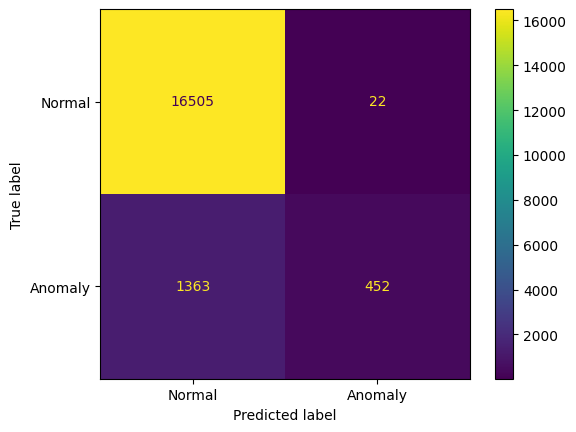

In [49]:
disp = ConfusionMatrixDisplay(confusion_matrix=iso_conf_matrix, display_labels=['Normal', 'Anomaly'])
disp.plot()

In [57]:
X_test_anom_tensor = make_windows(X_test_anom[sensor_cols], T)

X_pred = model.predict(X_test_anom_tensor)
mse_anom = np.mean((X_test_anom_tensor - X_pred)**2, axis=(1,2))
threshold = np.percentile(mse_anom, 99)
anomalies_anom = mse_anom > threshold

573/573 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step


In [76]:
X_test_anom_ae = X_test_anom.copy()
X_test_anom_ae['is_anomaly'] = False

idx = X_test_anom_ae.index

for i in range(anomalies_anom.shape[0]):
    if X_test_anom_ae['is_anomaly'][idx[i]]:
        continue  # skip if already marked
    if anomalies[i]:
        ids = idx[i:i+T]
        X_test_anom_ae.loc[ids, 'is_anomaly'] = True  # mark as anomaly
    
X_test_anom_ae.head()

Encoder_vAxisHFP_1  Encoder_vAxisHFP_2  Encoder_vAxisHFP_3  \
68640             0.417113            0.539544            0.287194   
26755             0.609220            0.481272            0.477966   
114725            0.457161            0.621107            0.443802   
180909            0.308007            0.410280            0.625472   
166015            0.450618            0.550415            0.557051   

        Encoder_vAxisHFP_4  Encoder_vAxisHFP_5  Encoder_vAxisHFP_6     Time  \
68640             0.491070            0.392397            0.577258  34.3200   
26755             0.636281            0.482822            0.576922  13.3775   
114725            0.399358            0.482374            0.478562  57.3625   
180909            0.448572            0.493963            0.398467  28.1545   
166015            0.467200            0.593231            0.561523  20.7075   

        is_anomaly  
68640        False  
26755        False  
114725       False  
180909       False  
166015       False

In [77]:
ae_presicion = precision_score(y_test['is_anomaly'], X_test_anom_ae['is_anomaly'])
ae_recall = recall_score(y_test['is_anomaly'], X_test_anom_ae['is_anomaly'])
ae_f1 = f1_score(y_test['is_anomaly'], X_test_anom_ae['is_anomaly'])
ae_class_report = classification_report(y_test['is_anomaly'], X_test_anom_ae['is_anomaly'])
ae_conf_matrix = confusion_matrix(y_test['is_anomaly'], X_test_anom_ae['is_anomaly'])

print(f'Transformer Autoencoder:\n\nPrecision: {ae_presicion:.4f},\nRecall: {ae_recall:.4f},\nF1-Score: {ae_f1:.4f}\n')
print(ae_class_report)

Transformer Autoencoder:

Precision: 0.1042,
Recall: 0.0275,
F1-Score: 0.0436

              precision    recall  f1-score   support

       False       0.90      0.97      0.94     16527
        True       0.10      0.03      0.04      1815

    accuracy                           0.88     18342
   macro avg       0.50      0.50      0.49     18342
weighted avg       0.82      0.88      0.85     18342



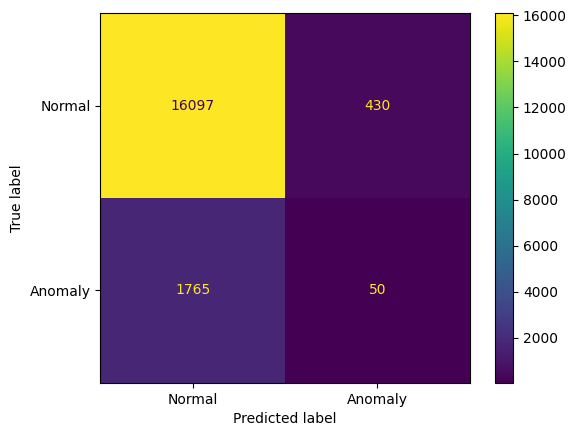

In [78]:
disp = ConfusionMatrixDisplay(confusion_matrix=ae_conf_matrix, display_labels=['Normal', 'Anomaly'])
disp.plot()

this doesnt look good, but the entire thing is further accentuated by the attention windows and my logic of marking the entire window as anomalous. Still I would expect more synthetic anomalies to be caught. Trying different methods of marking anomalies to check if those work better.

Trying to mark only the end id as anomaly

In [84]:
X_test_anom_ae = X_test_anom.copy()
X_test_anom_ae['is_anomaly'] = False

idx = X_test_anom_ae.index

for i in range(anomalies_anom.shape[0]):
    if X_test_anom_ae['is_anomaly'][idx[i]]:
        continue  # skip if already marked
    if anomalies[i]:
        X_test_anom_ae.loc[i+T-1, 'is_anomaly'] = True  # mark as anomaly
    
X_test_anom_ae.head()

Encoder_vAxisHFP_1  Encoder_vAxisHFP_2  Encoder_vAxisHFP_3  \
68640             0.417113            0.539544            0.287194   
26755             0.609220            0.481272            0.477966   
114725            0.457161            0.621107            0.443802   
180909            0.308007            0.410280            0.625472   
166015            0.450618            0.550415            0.557051   

        Encoder_vAxisHFP_4  Encoder_vAxisHFP_5  Encoder_vAxisHFP_6     Time  \
68640             0.491070            0.392397            0.577258  34.3200   
26755             0.636281            0.482822            0.576922  13.3775   
114725            0.399358            0.482374            0.478562  57.3625   
180909            0.448572            0.493963            0.398467  28.1545   
166015            0.467200            0.593231            0.561523  20.7075   

       is_anomaly  
68640       False  
26755       False  
114725      False  
180909      False  
166015      False

In [87]:
y_test['is_anomaly'].value_counts()

is_anomaly
False    16527
True      1815
Name: count, dtype: int64

In [88]:
X_test_anom_ae['is_anomaly'].value_counts()

is_anomaly
False    18308
True       335
Name: count, dtype: int64

In [ ]:
X_test_anom_ae.index.difference(y_test.index)

301

In [89]:
ae_presicion = precision_score(y_test['is_anomaly'], X_test_anom_ae['is_anomaly'])
ae_recall = recall_score(y_test['is_anomaly'], X_test_anom_ae['is_anomaly'])
ae_f1 = f1_score(y_test['is_anomaly'], X_test_anom_ae['is_anomaly'])
ae_class_report = classification_report(y_test['is_anomaly'], X_test_anom_ae['is_anomaly'])
ae_conf_matrix = confusion_matrix(y_test['is_anomaly'], X_test_anom_ae['is_anomaly'])

print(f'Transformer Autoencoder:\n\nPrecision: {ae_presicion:.4f},\nRecall: {ae_recall:.4f},\nF1-Score: {ae_f1:.4f}\n')
print(ae_class_report)

ValueError: Found input variables with inconsistent numbers of samples: [18342, 18643]